# iFood CRM Data Analyst Case

### About the case

#### Company Overview
Our company operates in the retail food sector, serving nearly one million consumers annually. We offer products in five major categories: wines, rare meat products, exotic fruits, specially prepared fish, and sweet products, available through physical stores, catalogs, and our website. Despite previous solid revenues and healthy bottom lines, the profit growth outlook for the next three years is unfavorable. In response, strategic initiatives are underway to enhance marketing performance, with a focus on campaigns.

#### Marketing Department's Focus
The marketing department is under pressure to optimize its annual budget. To adopt a more data-driven approach, the Chief Marketing Officer (CMO) has assembled a team of data scientists. Their primary goal is to develop a predictive model supporting direct marketing initiatives. Success in these endeavors is critical to demonstrate the value of data-driven decision-making.

#### Objective and Approach
The team aims to build a predictive model maximizing profit for the next direct marketing campaign, promoting a new gadget to the Customer Database. A pilot campaign involving 2,240 randomly selected customers was conducted, resulting in a 15% success rate. The model's objective is to predict customer behavior, identifying those most likely to purchase the offer. By applying the model to the entire customer base, we aim to optimize campaign profitability while studying the characteristics of gadget-buying customers.

______________________________________________________________________________________________________________________________

### Deliverables:
    1. Exploratory Data Analysis (EDA);
    2. Segmentation;
    3. Classification.
    
______________________________________________________________________________________________________________________________

# 0.0 Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os
import plotly.express as px
import urllib.request
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
# Define custom color palette
ifood_colors = ['#FF5900', '#00A8E0', '#7B1467', '#F5A623', '#009246', '#FFC800', '#DE0046', '#7440FF']

________________________________________________________________________________________________________________________________

# 1.0 Get the Data

## 1.1 Download the data

In [3]:
IFOOD_URL = "https://github.com/ifood/ifood-data-business-analyst-test/raw/master/ml_project1_data.csv"

def fetch_ifood_data():
    csv_path = "ml_project1_data.csv"
    urllib.request.urlretrieve(IFOOD_URL, csv_path)

def load_ifood_data():
    return pd.read_csv("ml_project1_data.csv")

In [4]:
fetch_ifood_data()
ifood_data = load_ifood_data()

________________________________________________________________________________________________________________________________

## 1.2 Quick look at the data structure

In [5]:
ifood_data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [6]:
ifood_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
# Ensuring there are no white spaces
ifood_data.columns = ifood_data.columns.str.replace(' ', '')

In [8]:
ifood_data.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

Saving figure attribute_histogram_plots


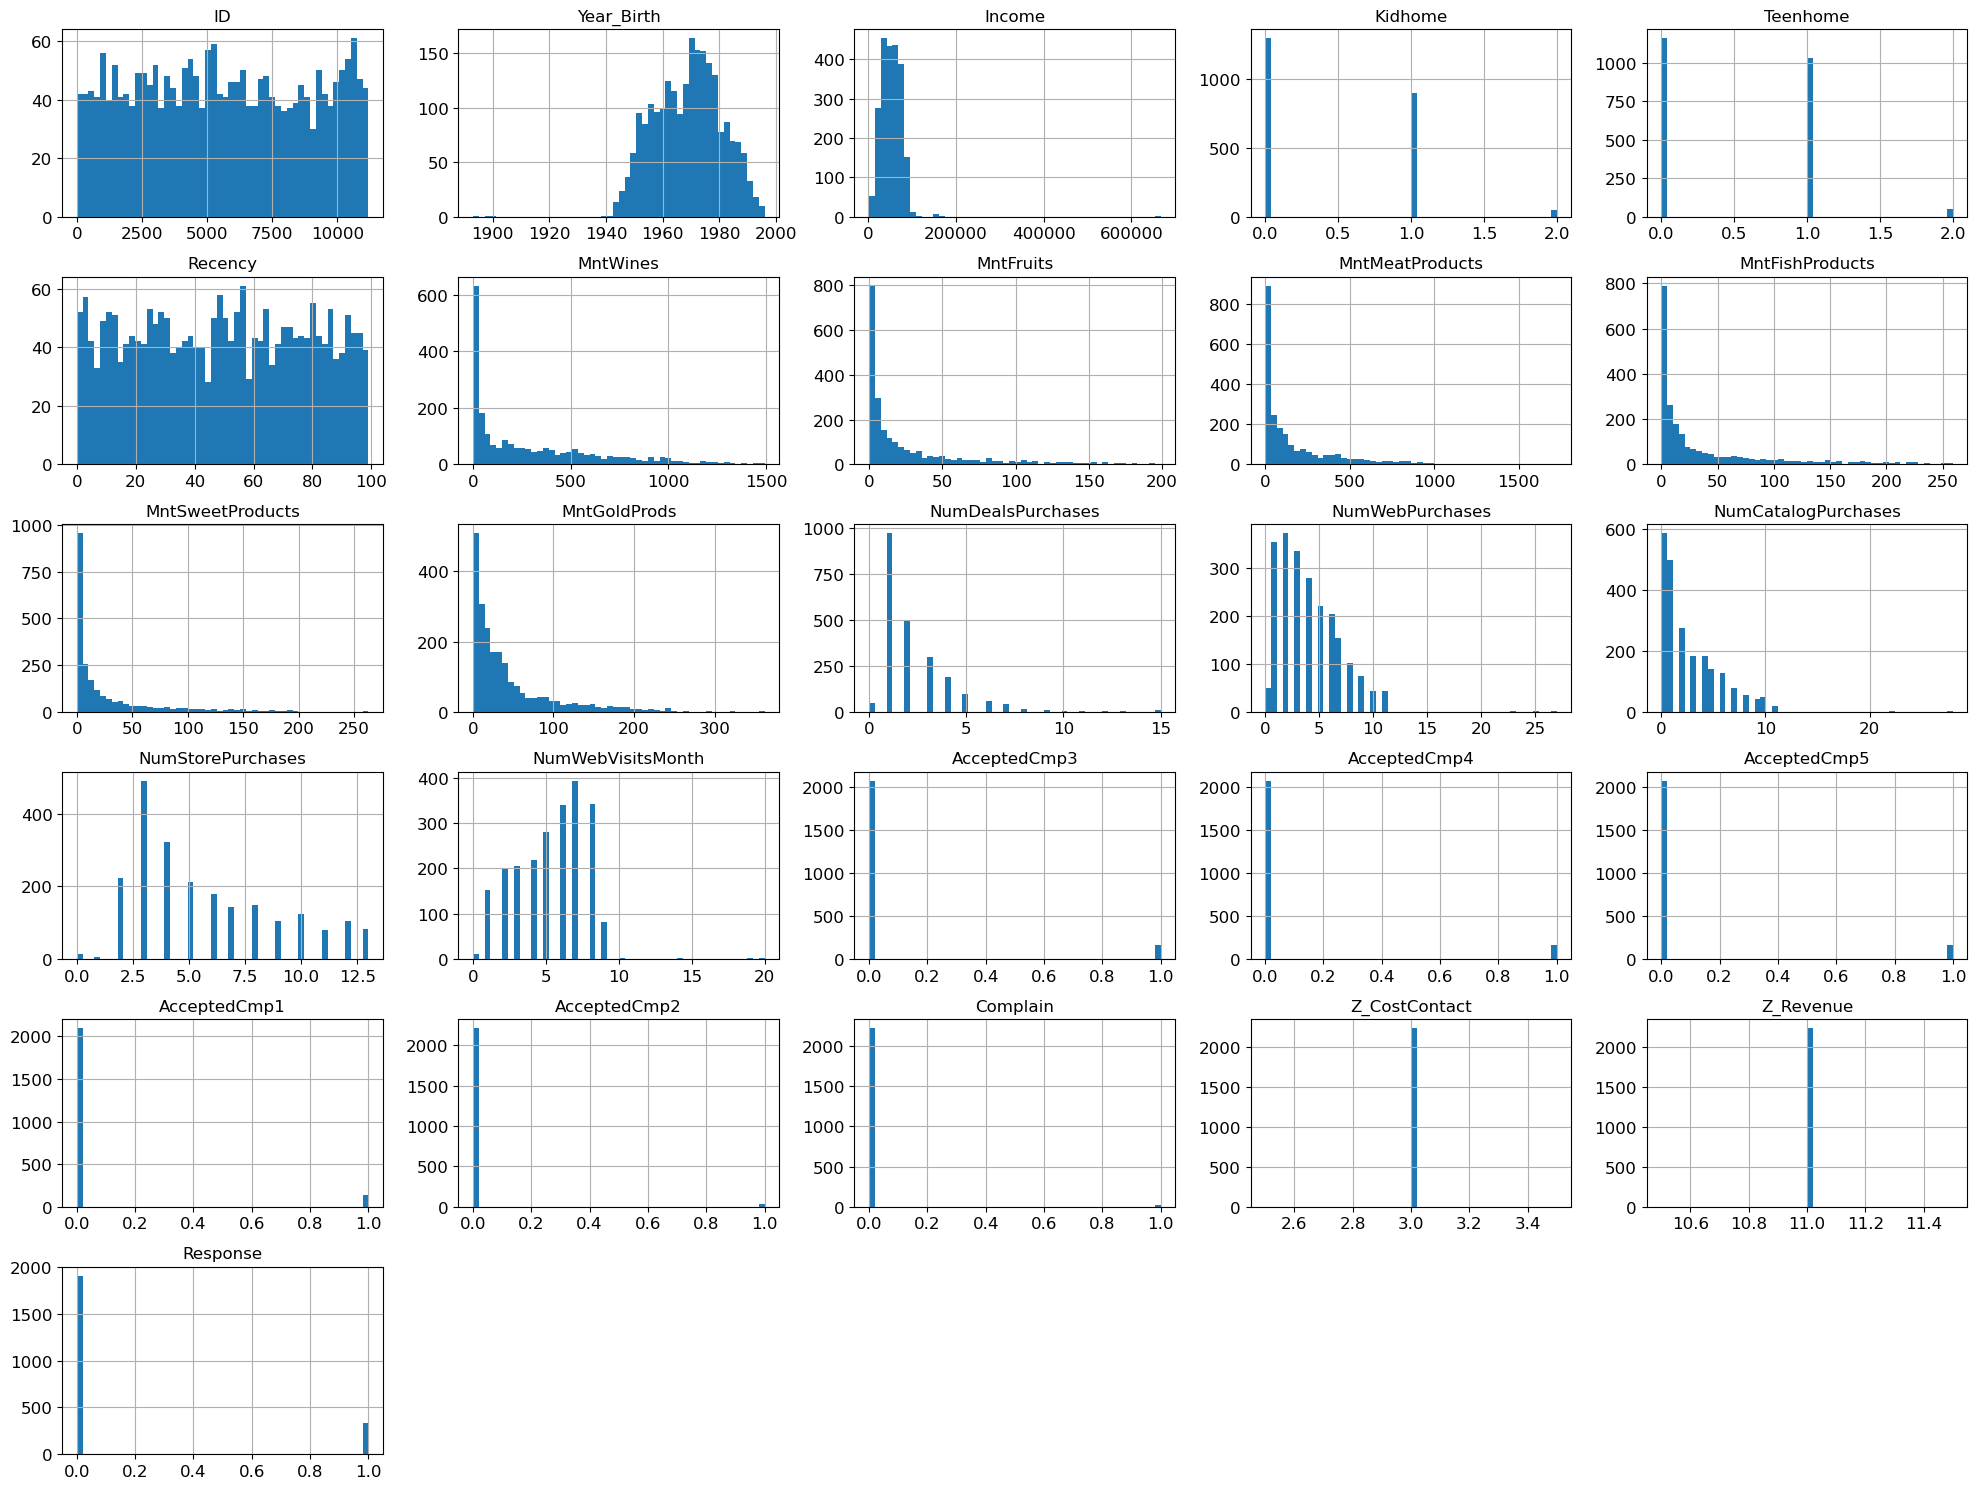

In [9]:
ifood_data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

________________________________________________________________________________________________________________________________

## 1.3 Creating test set


#### Important note: 

It is common to see the test set split immediately before creating a model. However, following Aurélien Geron's instructions, the test set should be separated even before exploratory analysis. The stratified approach was chosen due to the imbalance of the target variable, which had already been elucidated in the case statement.

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

# Divide dataset
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(ifood_data, ifood_data["Response"]):
    strat_train_set = ifood_data.iloc[train_index]
    strat_test_set = ifood_data.iloc[test_index]

In [11]:
strat_test_set["Response"].value_counts() / len(strat_test_set)

0    0.850446
1    0.149554
Name: Response, dtype: float64

In [12]:
ifood_data["Response"].value_counts() / len(ifood_data)

0    0.850893
1    0.149107
Name: Response, dtype: float64

#####  It can be noted the balance between the categories in Response regarding the initial dataset.

________________________________________________________________________________________________________________________________

## 1.4 Exploratory Data Analysis (EDA)

### 1.4.1 Some preprocessing first

In [13]:
ifood = strat_train_set.copy()

#### Changing data types

In [14]:
ifood.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [15]:
categ_cols = ['ID', 'Education', 'Marital_Status', 'AcceptedCmp1', 
            'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
            'AcceptedCmp5', 'Complain', 'Response']
            
numeric_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 
            'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

timestamp = ["Dt_Customer"]

# Change data types
ifood["Dt_Customer"] = pd.to_datetime(ifood["Dt_Customer"])

In [16]:
ifood.head()

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
1090  1127        1973       PhD        Married  85844.0        0         0   
15    2114        1946       PhD         Single  82800.0        0         0   
873    738        1981  2n Cycle         Single  42395.0        1         1   
610   7930        1969    Master         Single  26877.0        0         0   
657    946        1958  2n Cycle       Together  26490.0        0         0   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
1090  2014-05-29       62       938  ...                  2             0   
15    2012-11-24       23      1006  ...                  3             0   
873   2014-04-04       35        48  ...                  7             0   
610   2013-08-19       74       101  ...                  6             0   
657   2012-09-22       92        45  ...                  6             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
1090             0             1             0             0         0   
15               0             1             1             0         0   
873              0             0             0             0         0   
610              0             0             0             0         0   
657              0             0             0             0         0   

      Z_CostContact  Z_Revenue  Response  
1090              3         11         0  
15                3         11         1  
873               3         11         0  
610               3         11         0  
657               3         11         0  

[5 rows x 29 columns]

In [17]:
duplicate_rows_ifood = ifood[ifood.duplicated()]
print("number of duplicate rows: ", duplicate_rows_ifood.shape)

number of duplicate rows:  (0, 29)


#### Handling with missing values

In [18]:
sample_incomplete_rows = ifood[ifood.isnull().any(axis=1)].head()
sample_incomplete_rows

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
133    1295        1963  Graduation        Married     NaN        0         1   
1379  10475        1970      Master       Together     NaN        0         1   
2084   5250        1943      Master          Widow     NaN        0         0   
2228   8720        1978    2n Cycle       Together     NaN        0         0   
2078   5079        1971  Graduation        Married     NaN        1         1   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
133   2013-08-11       96       231  ...                  4             0   
1379  2013-04-01       39       187  ...                  5             0   
2084  2013-10-30       75       532  ...                  1             0   
2228  2012-08-12       53        32  ...                  0             0   
2078  2013-03-03       82        71  ...                  8             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
133              0             0             0             0         0   
1379             0             0             0             0         0   
2084             0             1             0             0         0   
2228             1             0             0             0         0   
2078             0             0             0             0         0   

      Z_CostContact  Z_Revenue  Response  
133               3         11         0  
1379              3         11         0  
2084              3         11         1  
2228              3         11         0  
2078              3         11         0  

[5 rows x 29 columns]

C:\Users\andre\AppData\Local\Temp\ipykernel_7960\1794349067.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ifood['Income'], kde=False, hist=True)


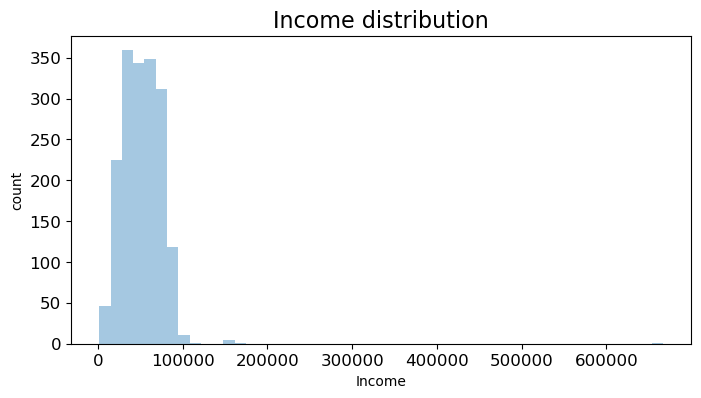

In [19]:
plt.figure(figsize=(8,4))
sns.distplot(ifood['Income'], kde=False, hist=True)
plt.title('Income distribution', size=16)
plt.ylabel('count')
plt.show()

<Axes: >

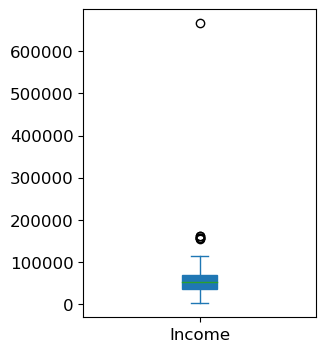

In [20]:
ifood['Income'].plot(kind='box', figsize=(3,4), patch_artist=True)

#### Important note:
Income is a very important variable, based on previous studies and economically speaking. It influences consumption patterns. Therefore, I will remove one outlier from income that is far above the tail, as it will alter my tests in the future. 

Also, to avoid skewing the mean due to outliers, I will input the missing values through the median.

In [21]:
# Remove rows where 'Income' is above 600000
ifood = ifood[ifood['Income'] <= 600000]

In [22]:
# Calculate the median value
median = ifood['Income'].median()

# Fill NaN values with the median value
ifood['Income'].fillna(median, inplace=True)

#### Looking for outliers

Saving figure outliers_plot


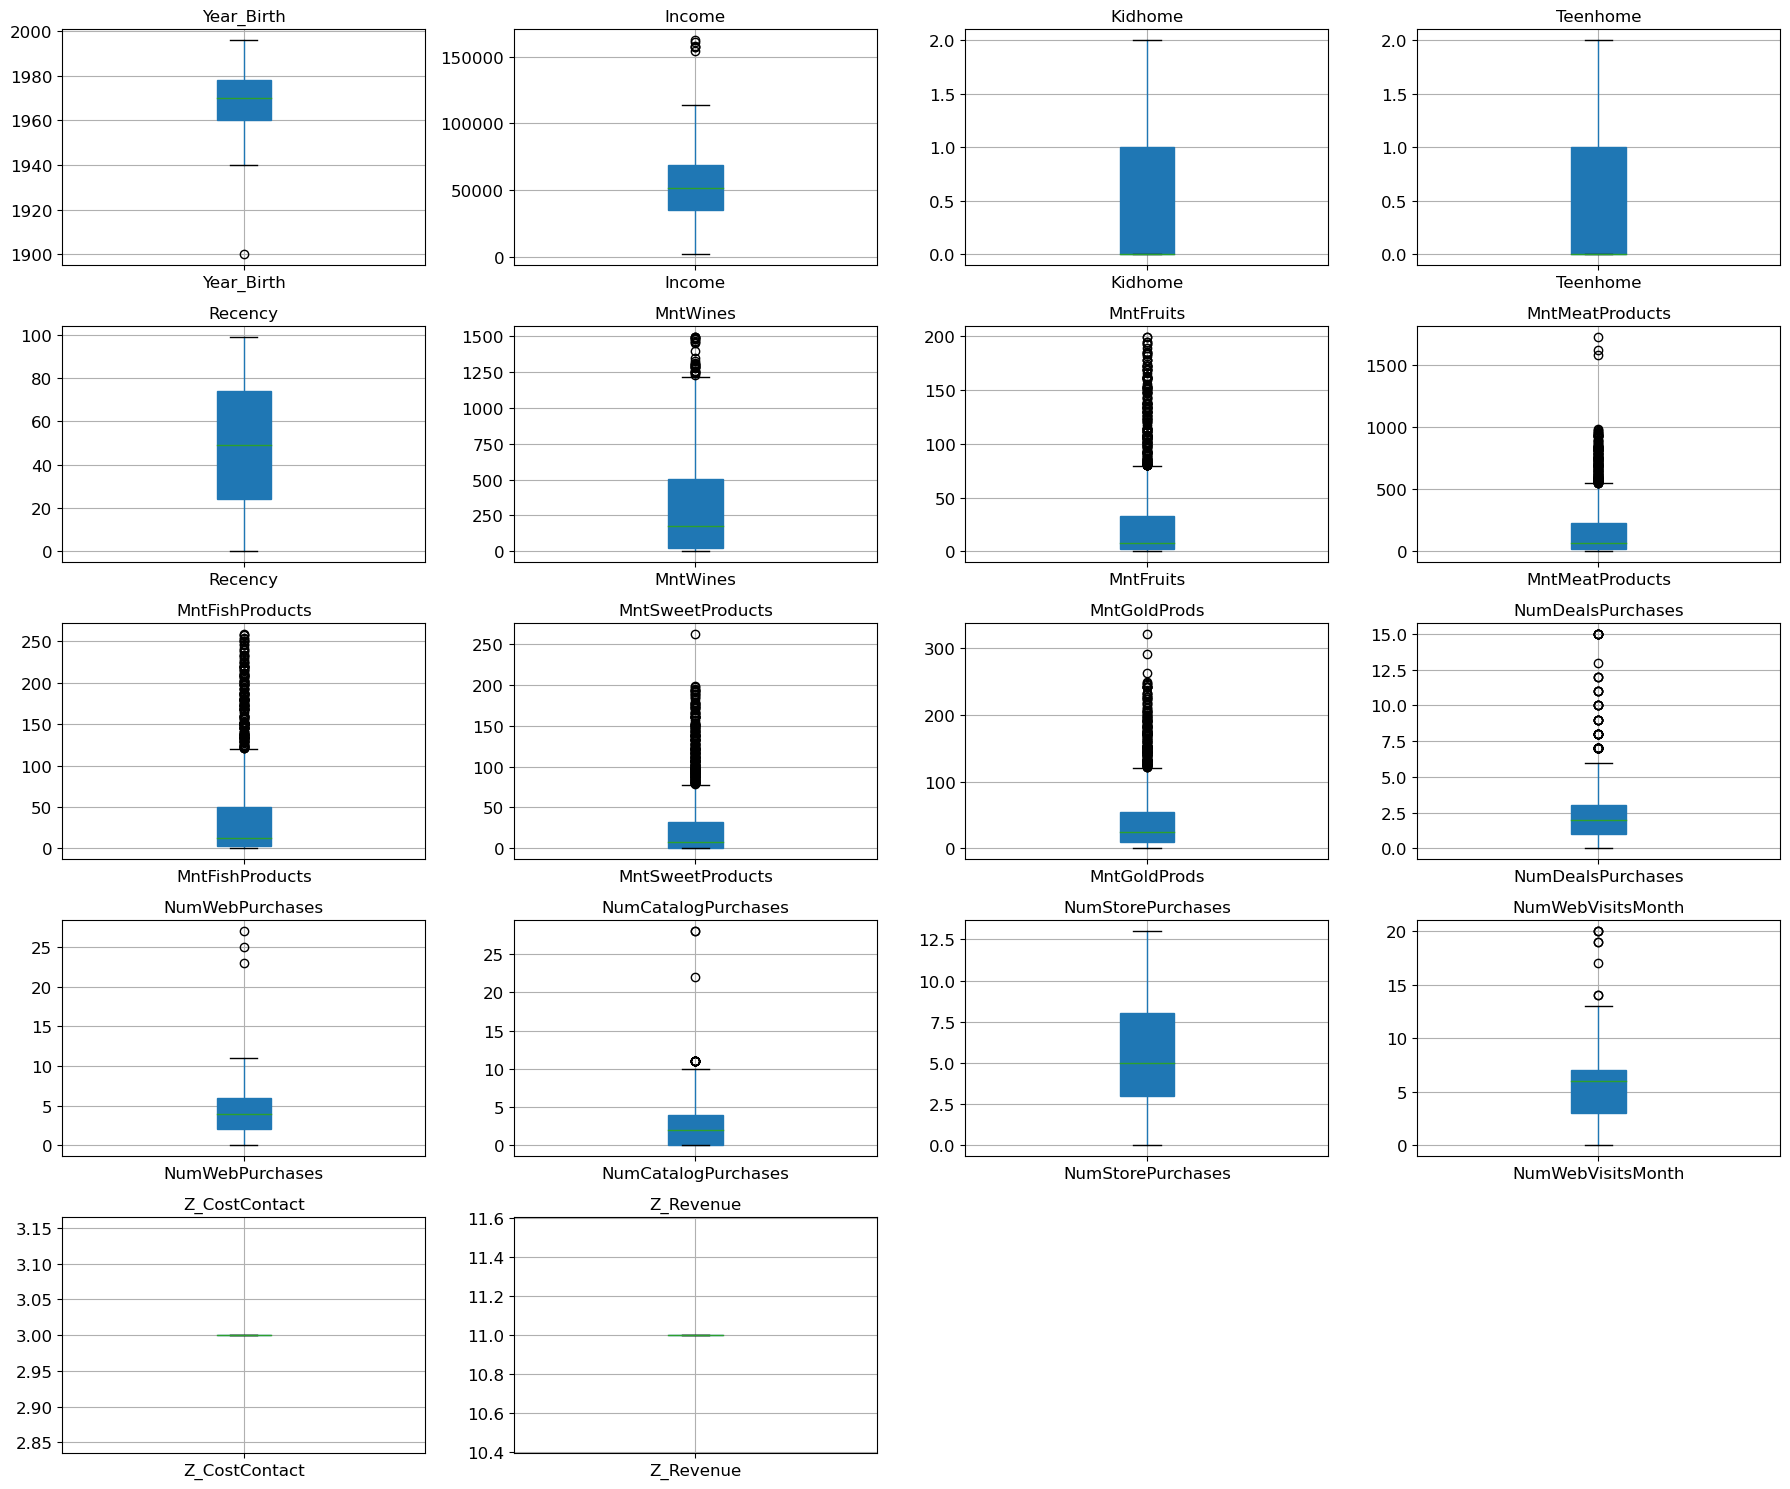

In [23]:
# Removing some variables of the plot
outliers_plot = ifood.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

# Calculate the number of rows and columns needed
num_vars = len(outliers_plot.columns)
num_cols = 4
num_rows = (num_vars + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 3*num_rows), squeeze=False)

# Flatten axes to iterate over them
axes = axes.flatten()

# Plot boxplots for each numerical variable
for i, column in enumerate(outliers_plot.columns):
    outliers_plot.boxplot(column=column, ax=axes[i], patch_artist=True)
    axes[i].set_title(column)

# Hide any empty subplots
for j in range(num_vars, num_cols*num_rows):
    fig.delaxes(axes[j])

plt.tight_layout()
save_fig("outliers_plot")
plt.show()

#### Important note:

Strange to have a birth year 1893 when the oldest person in the world was born in 1907. I'll consider 100 years as the maximum, born after 1924. I will keep all other outliers because they seem relevant for analysis, even though additional treatments are needed to model with them.

In [24]:
# Removing age > 100
ifood = ifood.drop(ifood[ifood['Year_Birth'] < 1924].index)

#### Important note:

Z_CostContact (3 MU) and Z_Revenue (11 MU) are constants used for measuring results, so I'm going to drop them to have a cleaner dataset.

In [25]:
# Drop Z_CostContact and Z_Revenue
ifood.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

________________________________________________________________________________________________________________________________

### 1.4.2 Exploring distribution and correlations

In [26]:
ifood["Education"].value_counts()

Graduation    877
PhD           383
Master        303
2n Cycle      159
Basic          47
Name: Education, dtype: int64

In [27]:
# Count the education levels
education_counts = ifood['Education'].value_counts(normalize=True) * 100

# Create DataFrame
df_education = pd.DataFrame({'Education_Level': education_counts.index,
                             'Percentage': education_counts.values})

# Create bar chart
fig = px.bar(df_education, x='Education_Level', y='Percentage',
             title='Distribution of Education Levels',
             labels={'Percentage': 'Percentage (%)', 'Education_Level': 'Education Level'},
             color='Education_Level', color_discrete_sequence=ifood_colors)

# Add percentages on top of bars
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

# Show plot
save_fig("education_plot")
fig.show()

Saving figure education_plot


<Figure size 640x480 with 0 Axes>

In [28]:
ifood["Marital_Status"].value_counts()

Married     695
Together    452
Single      374
Divorced    182
Widow        59
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [29]:
# Dropping rows with values "Alone", "Absurd", and "YOLO" in the "Marital_Status" column
ifood = ifood[~ifood["Marital_Status"].isin(["Alone", "Absurd", "YOLO"])]

In [30]:
# Count the marital status
marital_counts = ifood['Marital_Status'].value_counts(normalize=True) * 100

# Create DataFrame
df_marital = pd.DataFrame({'Marital_Status': marital_counts.index,
                           'Percentage': marital_counts.values})

# Create bar chart for Marital_Status with ifood_colors
fig_marital = px.bar(df_marital, x='Marital_Status', y='Percentage',
                      title='Distribution of Marital Status',
                      labels={'Percentage': 'Percentage (%)', 'Marital_Status': 'Marital Status'},
                      color='Marital_Status', color_discrete_sequence=ifood_colors)

# Add percentages on top of bars
fig_marital.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

# Show plot
save_fig("marital_status_plot")
fig_marital.show()

Saving figure marital_status_plot


<Figure size 640x480 with 0 Axes>

Saving figure numeric_histogram_plots


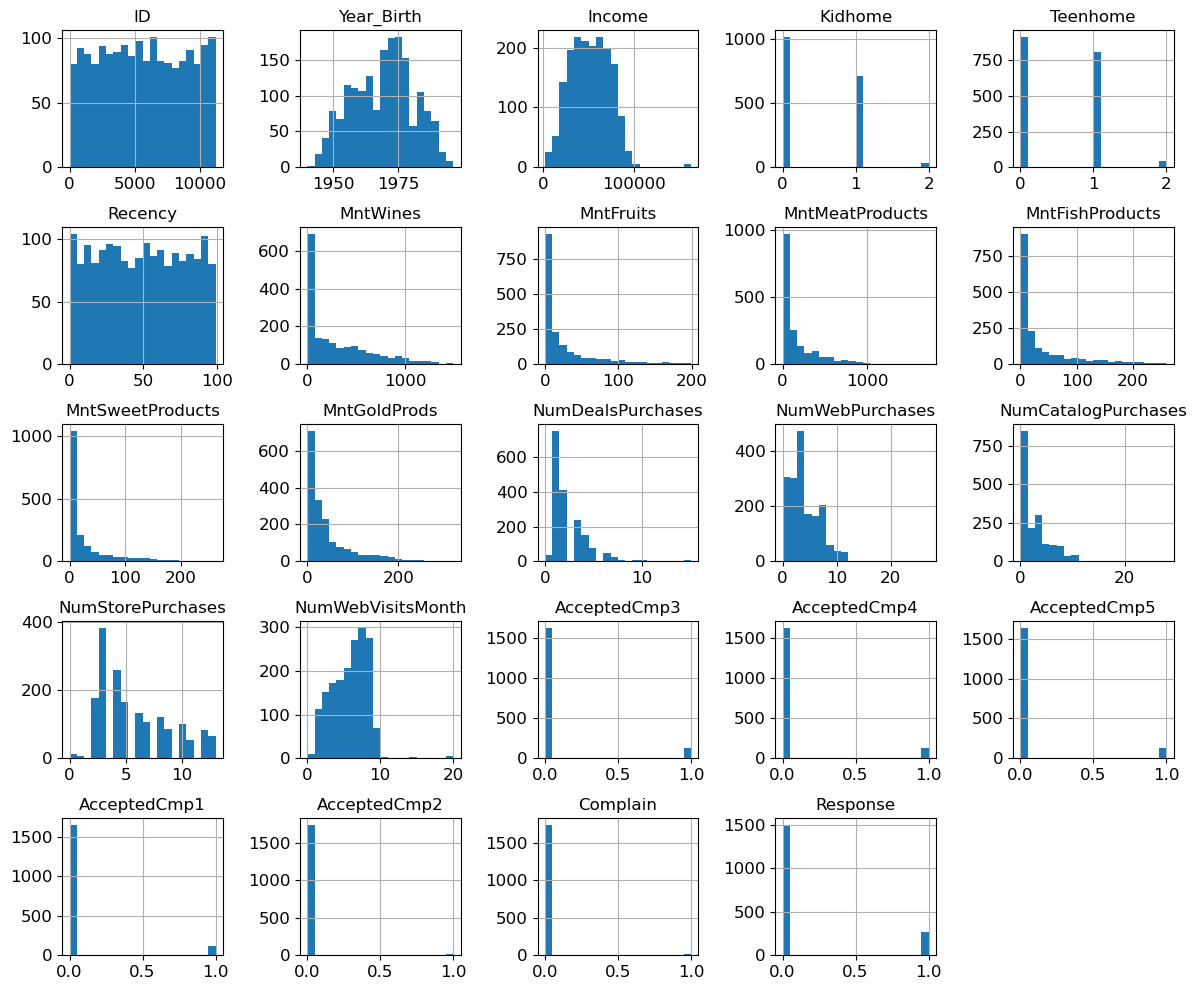

In [31]:
# Distribution visualization of numeric variables

# Get the list of numerical column names
numeric_vars = ifood.select_dtypes(include=['float64', 'int64']).columns

ifood[numeric_vars].hist(bins=20, figsize=(12, 10))
save_fig("numeric_histogram_plots")
plt.show()

In [32]:
ifood.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [33]:
from scipy.stats import skew, kurtosis

numeric_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                'Recency', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','NumDealsPurchases', 'NumWebPurchases', 
                'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in numeric_cols:
    data = ifood[column].dropna(axis=0) 
    q1 = data.quantile(q=0.25)
    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]
    q3 = data.quantile(q=0.75)
    # skew_val = round(data.skew(),3)
    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)
            
dist = pd.DataFrame({
    "Column Name": numeric_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

# for bimodial

dist.loc[dist["Column Name"].isin(["Kidhome", "Teenhome"]), "Type of Distribution"] = "Bimodal Distribution"
dist

Column Name  Skewness  Kurtosis  \
0            Year_Birth    -0.111    -0.773   
1                Income     0.359     0.760   
2               Kidhome     0.630    -0.795   
3              Teenhome     0.429    -0.939   
4               Recency     0.014    -1.210   
5              MntWines     1.183     0.645   
6             MntFruits     2.110     4.074   
7       MntMeatProducts     2.005     4.860   
8               Recency     0.014    -1.210   
9       MntFishProducts     1.917     3.075   
10     MntSweetProducts     2.121     4.187   
11         MntGoldProds     1.874     3.333   
12    NumDealsPurchases     2.533     9.935   
13      NumWebPurchases     1.285     4.738   
14  NumCatalogPurchases     1.863     8.091   
15    NumStorePurchases     0.705    -0.609   
16    NumWebVisitsMonth     0.338     2.345   

                          Type of Distribution  
0              Normal Distribution (Symmetric)  
1   Moderately Normal Distribution (Symmetric)  
2                         Bimodal Distribution  
3                         Bimodal Distribution  
4              Normal Distribution (Symmetric)  
5                     Highly Positively Skewed  
6                     Highly Positively Skewed  
7                     Highly Positively Skewed  
8              Normal Distribution (Symmetric)  
9                     Highly Positively Skewed  
10                    Highly Positively Skewed  
11                    Highly Positively Skewed  
12                    Highly Positively Skewed  
13                    Highly Positively Skewed  
14                    Highly Positively Skewed  
15                Moderately Positively Skewed  
16  Moderately Normal Distribution (Symmetric)

Saving figure distr_amount_plots


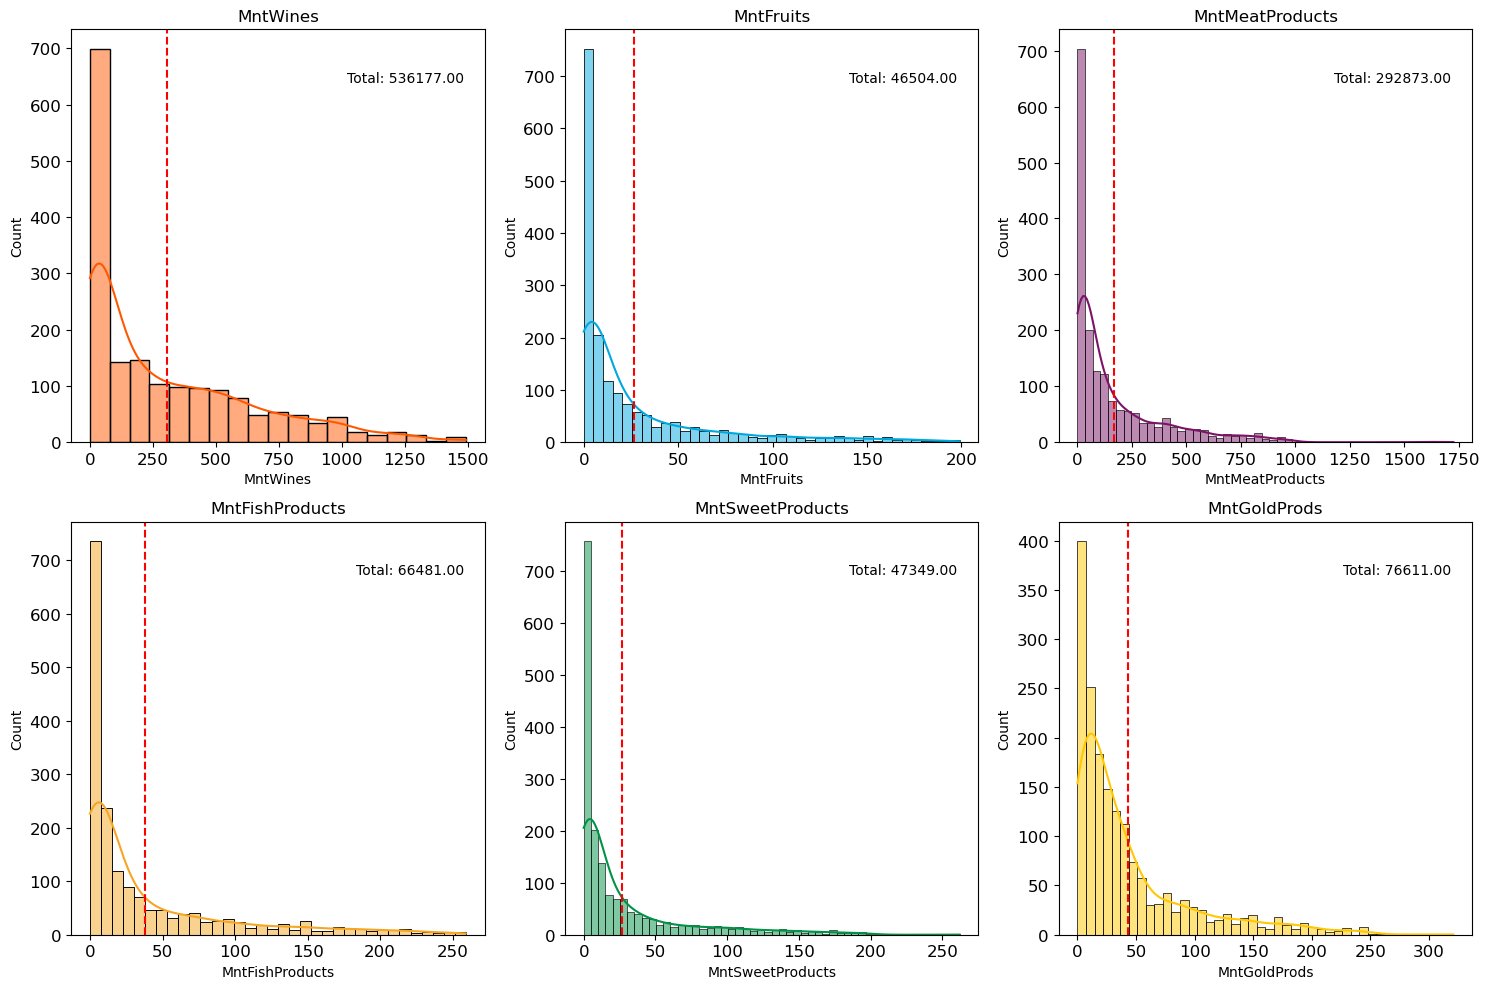

In [34]:
# List of variables that were summed to calculate total amounts
total_amount_vars = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Create subplots for distribution plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten axes to iterate over them
axes = axes.flatten()

# Create distribution plots for each variable
for i, var in enumerate(total_amount_vars):
    sns.histplot(ifood[var], ax=axes[i], kde=True, color=ifood_colors[i])
    axes[i].set_title(var)
    # Add mean to the plot
    mean_value = ifood[var].mean()
    axes[i].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    # Add total value to the plot
    total_value = ifood[var].sum()
    axes[i].text(0.95, 0.9, f'Total: {total_value:.2f}', ha='right', va='top', transform=axes[i].transAxes)

plt.tight_layout()
save_fig("distr_amount_plots")
plt.show()

Saving figure distr_purchases_plots


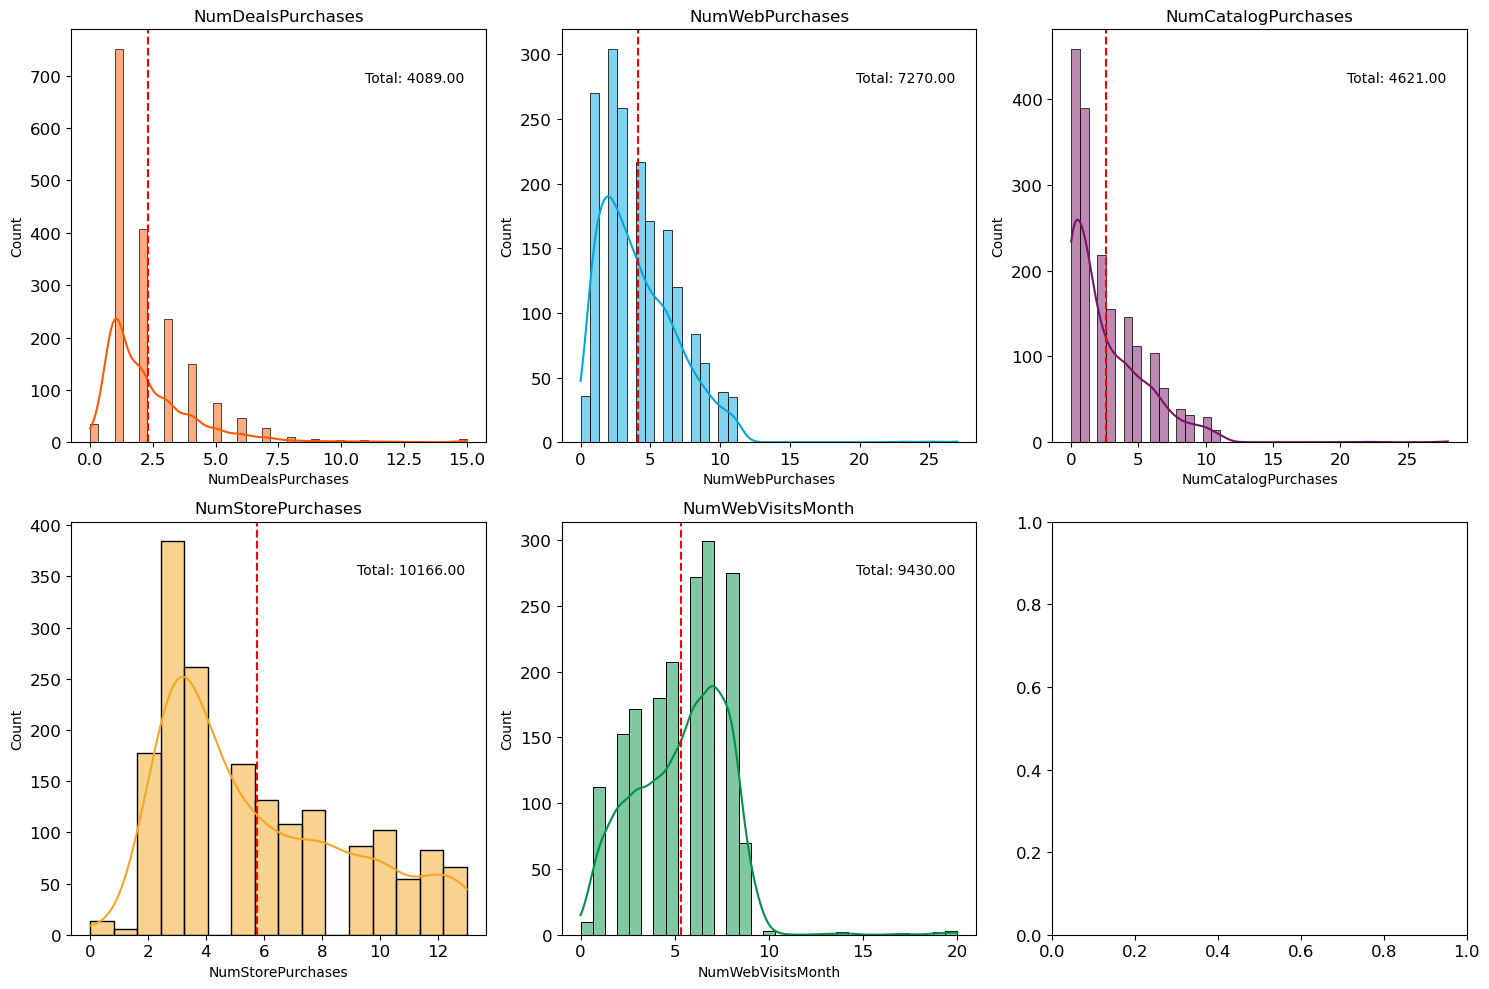

In [35]:
# List of variables related to volume of purchases
purchases_vars = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Create subplots for distribution plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten axes to iterate over them
axes = axes.flatten()

# Create distribution plots for each variable
for i, var in enumerate(purchases_vars):
    sns.histplot(ifood[var], ax=axes[i], kde=True, color=ifood_colors[i])
    axes[i].set_title(var)
    # Add mean to the plot
    mean_value = ifood[var].mean()
    axes[i].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    # Add total value to the plot
    total_value = ifood[var].sum()
    axes[i].text(0.95, 0.9, f'Total: {total_value:.2f}', ha='right', va='top', transform=axes[i].transAxes)

plt.tight_layout()
save_fig("distr_purchases_plots")
plt.show()

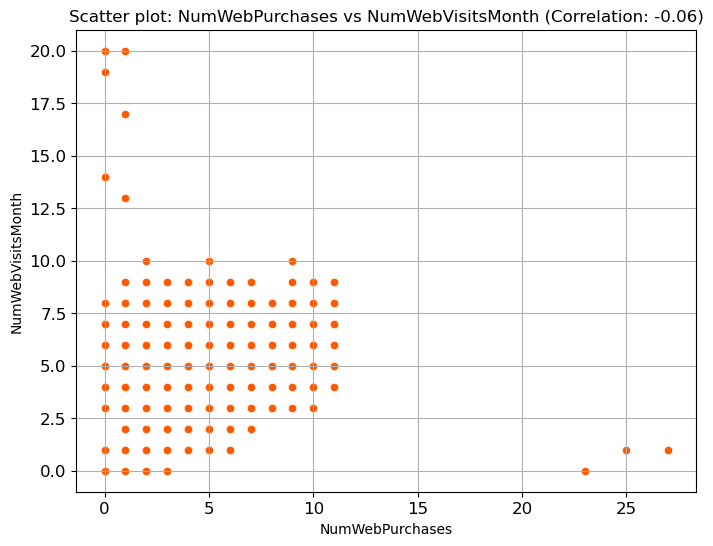

In [36]:
# Calculate correlation coefficient
correlation = ifood['NumWebPurchases'].corr(ifood['NumWebVisitsMonth'])

# Scatter plot between NumWebPurchases and NumWebVisitsMonth
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NumWebPurchases', y='NumWebVisitsMonth', data=ifood, color=ifood_colors[0])
plt.title(f'Scatter plot: NumWebPurchases vs NumWebVisitsMonth (Correlation: {correlation:.2f})')
plt.xlabel('NumWebPurchases')
plt.ylabel('NumWebVisitsMonth')
plt.grid(True)
plt.show()

<Figure size 1000x800 with 0 Axes>

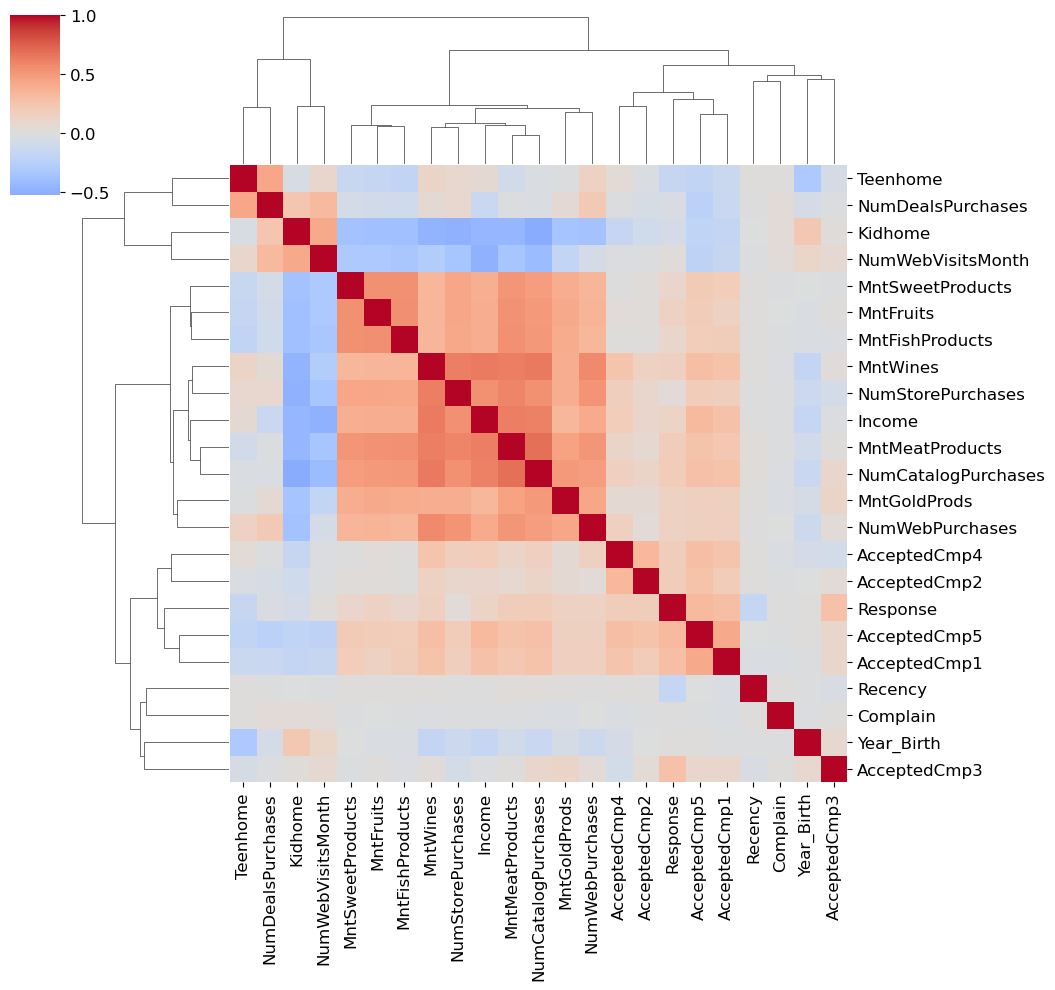

In [37]:
# Calculate correlation matrix using non-parametric test of correlation (Kendall)
corrs = ifood.drop(columns='ID').select_dtypes(include=np.number).corr(method='kendall')

# Plot clustered heatmap of correlations
plt.figure(figsize=(10, 8))
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0)
plt.show()

In [38]:
corr_matrix = ifood.corr(method='kendall')
corr_matrix['Response'].sort_values(ascending=False)

C:\Users\andre\AppData\Local\Temp\ipykernel_7960\235336608.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Response               1.000000
AcceptedCmp5           0.320623
AcceptedCmp1           0.297717
AcceptedCmp3           0.274044
NumCatalogPurchases    0.195358
AcceptedCmp2           0.176337
AcceptedCmp4           0.175754
MntMeatProducts        0.173132
MntWines               0.154900
NumWebPurchases        0.144719
MntGoldProds           0.141723
MntFruits              0.140679
Income                 0.124885
MntSweetProducts       0.101003
MntFishProducts        0.087294
NumStorePurchases      0.030880
NumWebVisitsMonth      0.020553
Year_Birth             0.016992
Complain               0.004962
NumDealsPurchases     -0.030183
ID                    -0.031190
Kidhome               -0.067404
Teenhome              -0.158013
Recency               -0.165174
Name: Response, dtype: float64

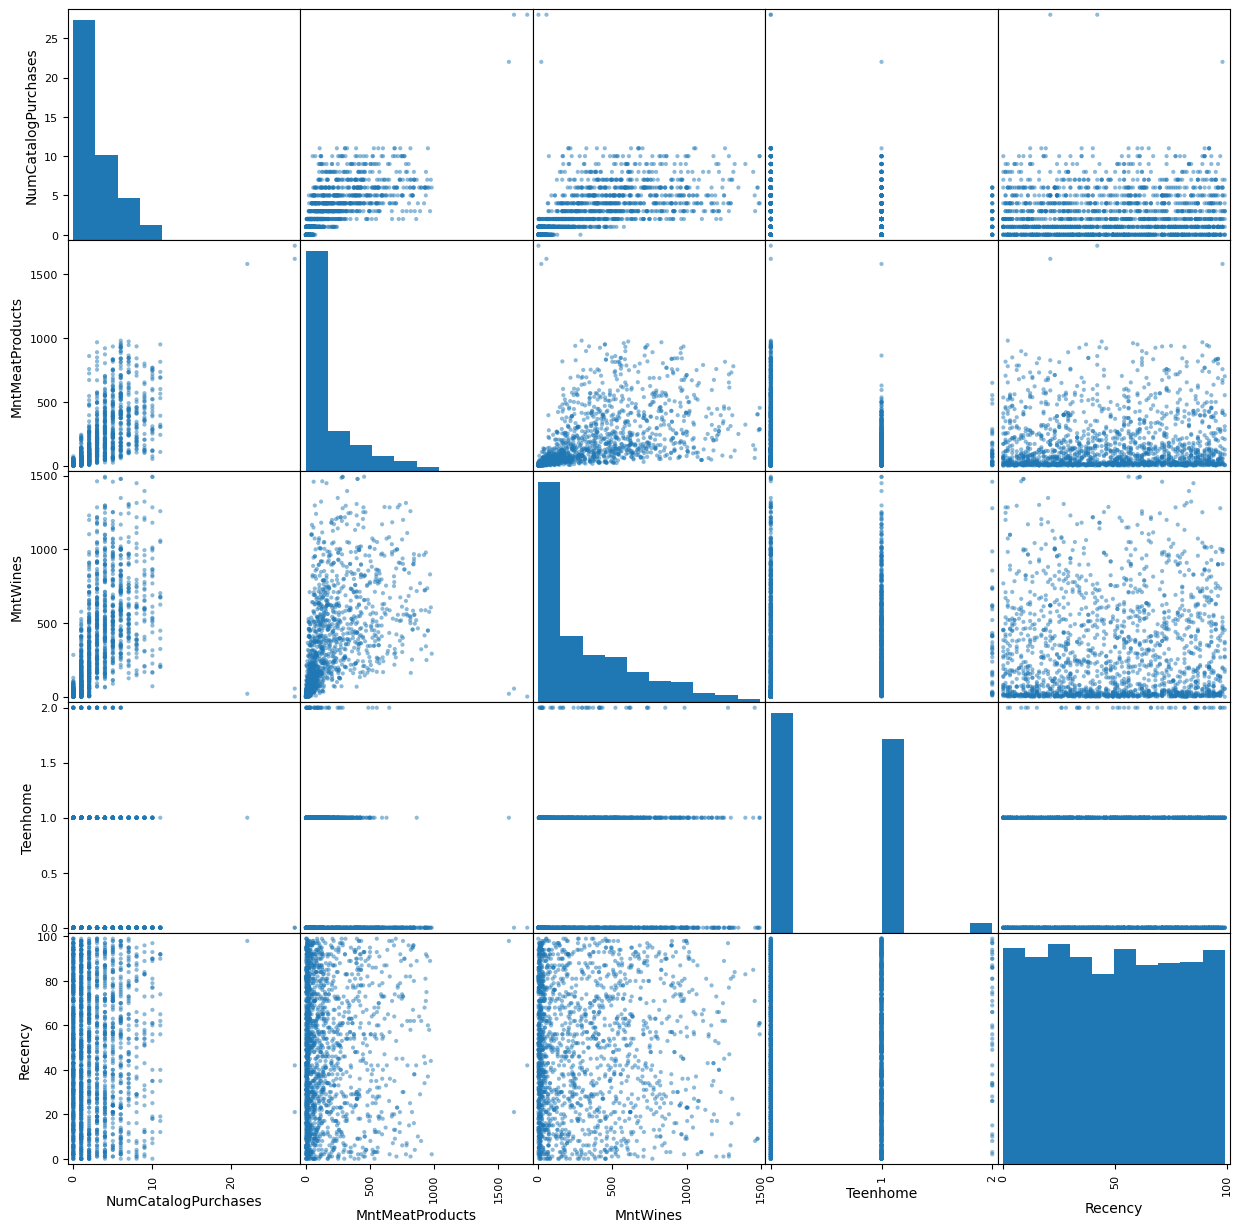

In [39]:
from pandas.plotting import scatter_matrix

attributes = ['NumCatalogPurchases', 'MntMeatProducts', 'MntWines', 'Teenhome', 'Recency']

scatter_matrix(ifood[attributes], figsize=(15, 15))
plt.show()

________________________________________________________________________________________________________________________________

### 1.4.3 Feature Engineering

### New features:

1. The time of being a customer can be calculated in years ('Time_Customer_Years') or months ('Time_Customer_Months') from 'Dt_Customer'.
2. Age can be calculated from 'Year_Birth'.
3. The total amount spent ('Total_Mnt') can be engineered from the sum of all features containing the keyword 'Mnt'.
4. The total purchases ('Total_Purchases') can be engineered from the sum of all features containing the keyword 'Purchases'.
5. The total number of campaigns accepted ('Total_Campaigns_Accepted') can be engineered from the sum of all features containing 6. the keywords 'Cmp' and 'Response'.
7. The number of children ('Num_Children') can be engineered from the sum of 'Kidhome' and 'Teenhome'.
8. 'Income_Per_Person' can be calculated considering Marital_Status and Children.

In [40]:
from datetime import datetime

# Calculate time as customer in months
current_date = datetime.now()  # Get the current date

# Time as customer in months
ifood['Time_Customer_Months'] = ((current_date - ifood['Dt_Customer']) / np.timedelta64(1, 'M')).astype(int)

# Time as customer in months into years
ifood['Time_Customer_Years'] = ifood['Time_Customer_Months'] / 12

# Round 'Time_As_Customer_Years' to one decimal place
ifood['Time_Customer_Years'] = ifood['Time_Customer_Years'].round(1)

In [41]:
# Calculate age
current_year = current_date.year
ifood['Age'] = current_year - ifood['Year_Birth']  # Calculate age

max_age = ifood['Age'].max()
print("Maximum Age:", max_age)

Maximum Age: 84


In [42]:
# Drop those 2 columns, they're not necessary anymore
ifood.drop(columns=['Year_Birth', 'Dt_Customer'], inplace=True)

In [43]:
# Total Amount Spent
mnt_cols = [col for col in ifood.columns if 'Mnt' in col]
ifood['Total_Mnt'] = ifood[mnt_cols].sum(axis=1)

# Total Purchases
purchase_cols = [col for col in ifood.columns if 'Purchases' in col]
ifood['Total_Purchases'] = ifood[purchase_cols].sum(axis=1)

# Total Campaigns Accepted
campaign_cols = [col for col in ifood.columns if 'Cmp' in col] + ['Response']
ifood['Total_Campaigns_Accepted'] = ifood[campaign_cols].sum(axis=1)

In [44]:
# Initial treatment according to the relationship status
ifood['Income_Per_Person'] = ifood['Income']  # Creating a new column for income per person

# Number of children
ifood['Num_Children'] = ifood['Kidhome'] + ifood['Teenhome']

# Mapping persons per Marital Status
marital_status_mapping = {'Married': 2, 'Together': 2, 'Single': 1, 'Divorced': 1, 'Widow': 1}
ifood['Marital_Status_Codf'] = ifood['Marital_Status'].map(marital_status_mapping)

# Adding the number of children
ifood['Num_Family_Members'] = ifood['Marital_Status_Codf'] + ifood['Num_Children']

# Calculating the average income per person
ifood['Income_Per_Person'] = ifood['Income_Per_Person'] / ifood['Num_Family_Members']

In [45]:
ifood.drop(columns='Marital_Status_Codf', inplace=True)

In [46]:
ifood[['Time_Customer_Months', 'Time_Customer_Years', 'Age', 'Total_Mnt', 'Total_Purchases', 'Num_Children', 'Income_Per_Person']].head()

Time_Customer_Months  Time_Customer_Years  Age  Total_Mnt  \
1090                   118                  9.8   51       1958   
15                     136                 11.3   78       1315   
873                    119                  9.9   43        182   
610                    127                 10.6   55        268   
657                    138                 11.5   66        210   

      Total_Purchases  Num_Children  Income_Per_Person  
1090               20             0       42922.000000  
15                 26             0       82800.000000  
873                12             2       14131.666667  
610                12             0       26877.000000  
657                11             0       13245.000000

________________________________________________________________________________________________________________________________

### 1.4.4 Deep dive into features

Saving figure outliers_eng_plot


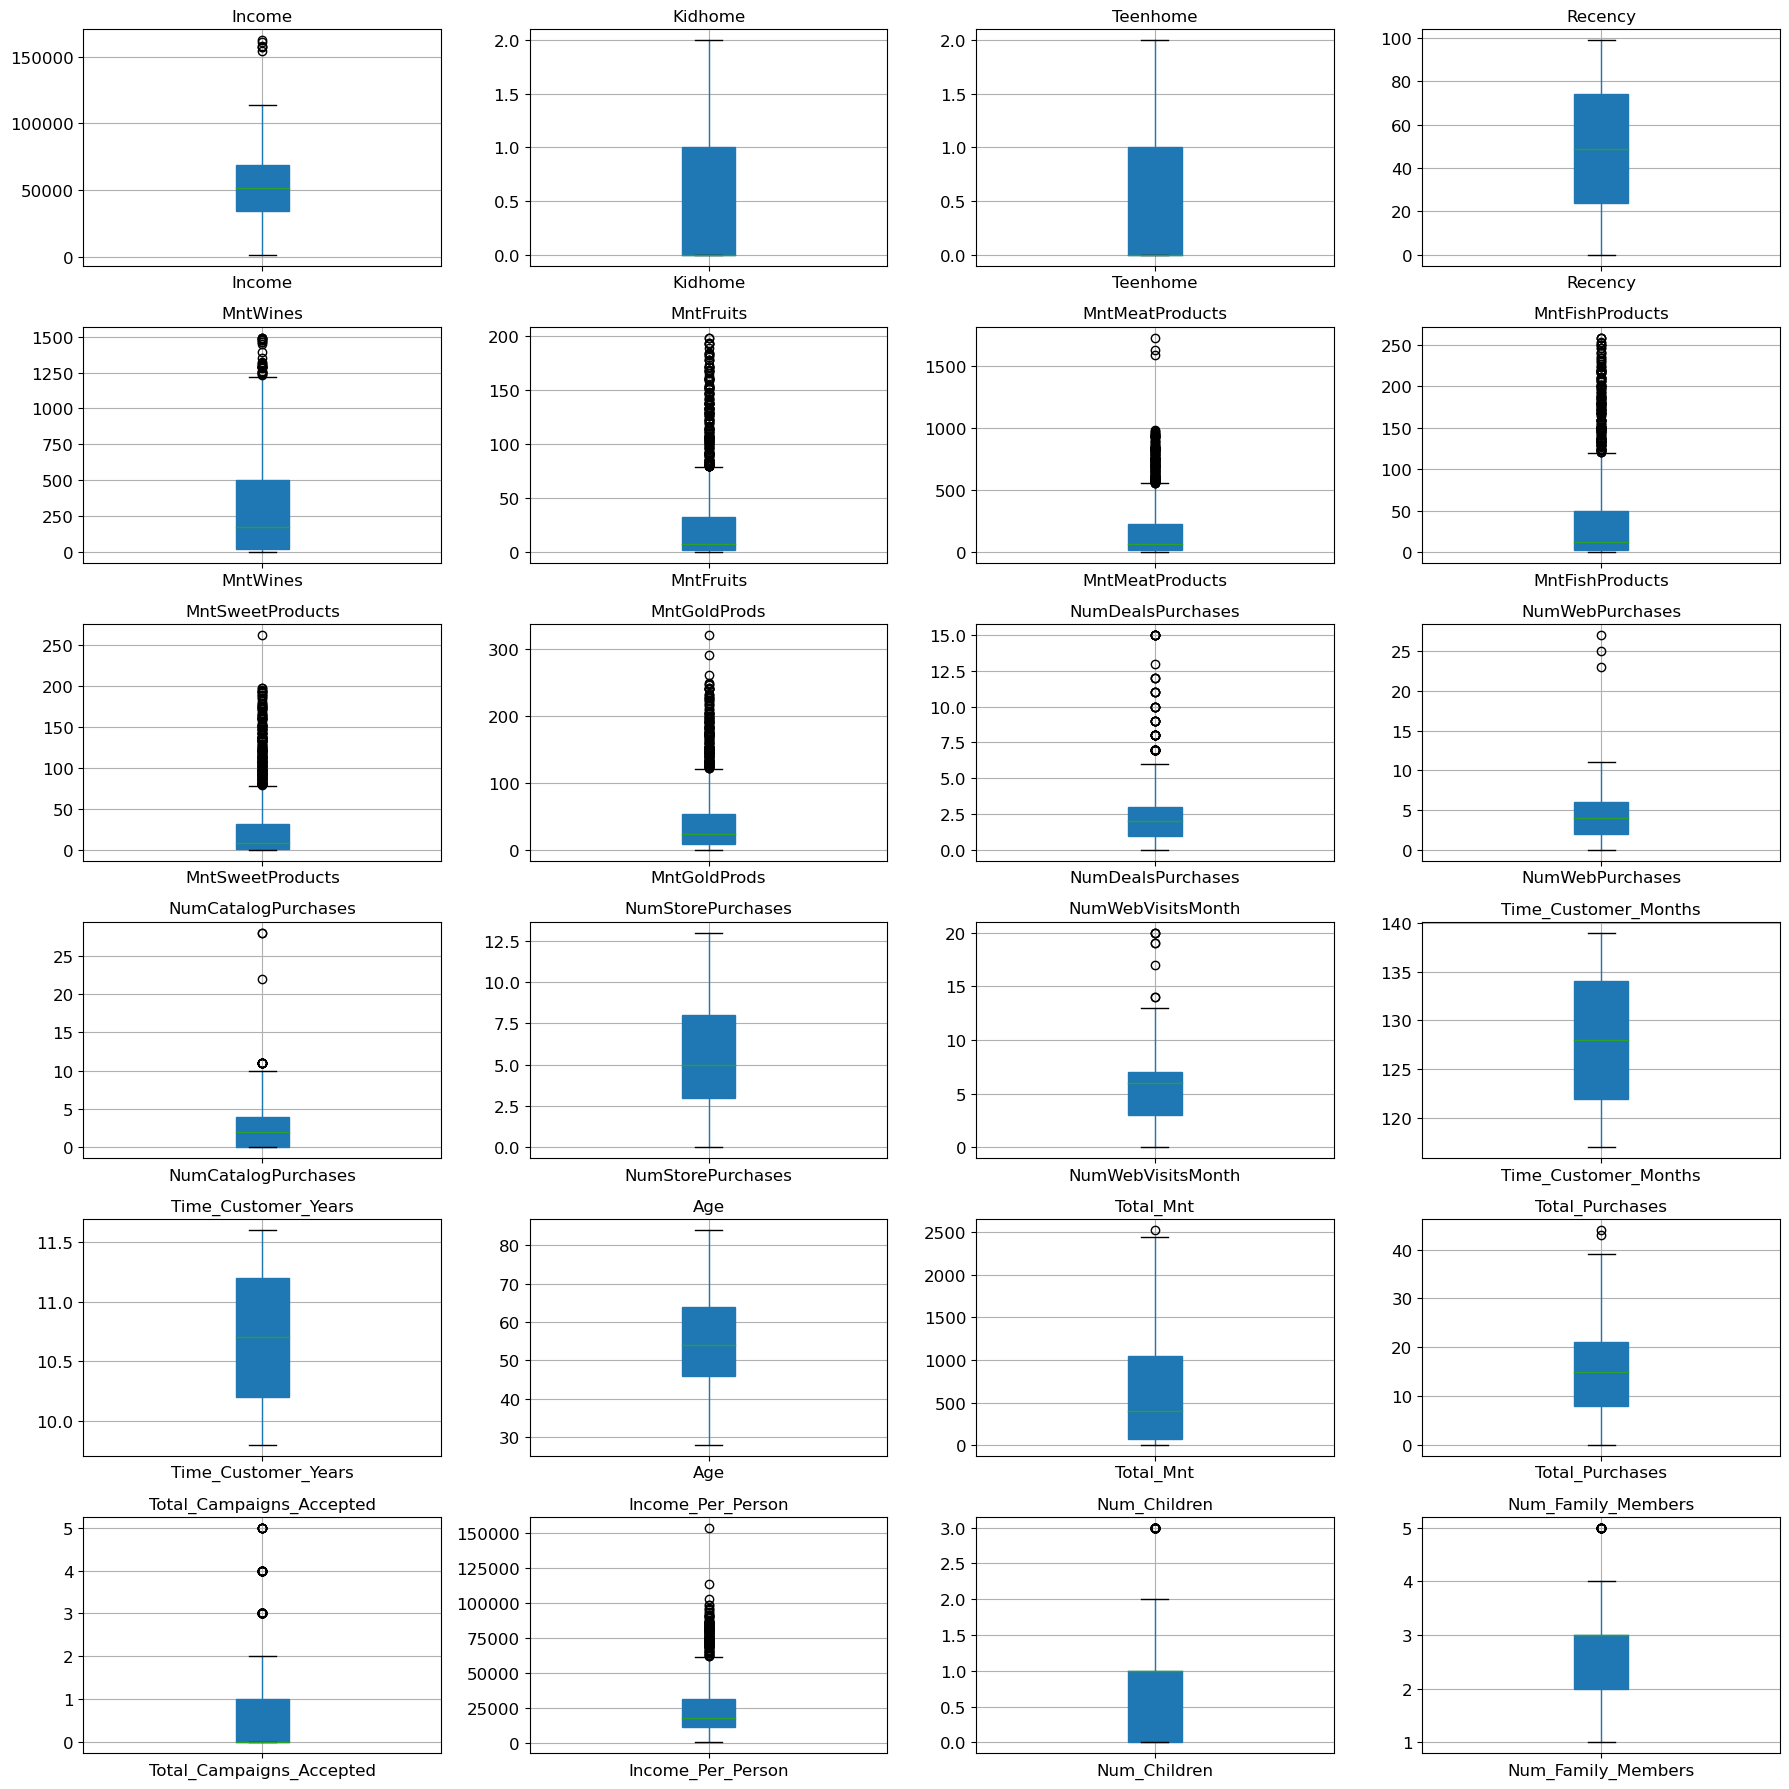

In [47]:
# Removing some variables of the plot
outliers_plot = ifood.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

# Calculate the number of rows and columns needed
num_vars = len(outliers_plot.columns)
num_cols = 4
num_rows = (num_vars + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 3*num_rows), squeeze=False)

# Flatten axes to iterate over them
axes = axes.flatten()

# Plot boxplots for each numerical variable
for i, column in enumerate(outliers_plot.columns):
    outliers_plot.boxplot(column=column, ax=axes[i], patch_artist=True)
    axes[i].set_title(column)

# Hide any empty subplots
for j in range(num_vars, num_cols*num_rows):
    fig.delaxes(axes[j])

plt.tight_layout()
save_fig("outliers_eng_plot")
plt.show()

<Figure size 1000x800 with 0 Axes>

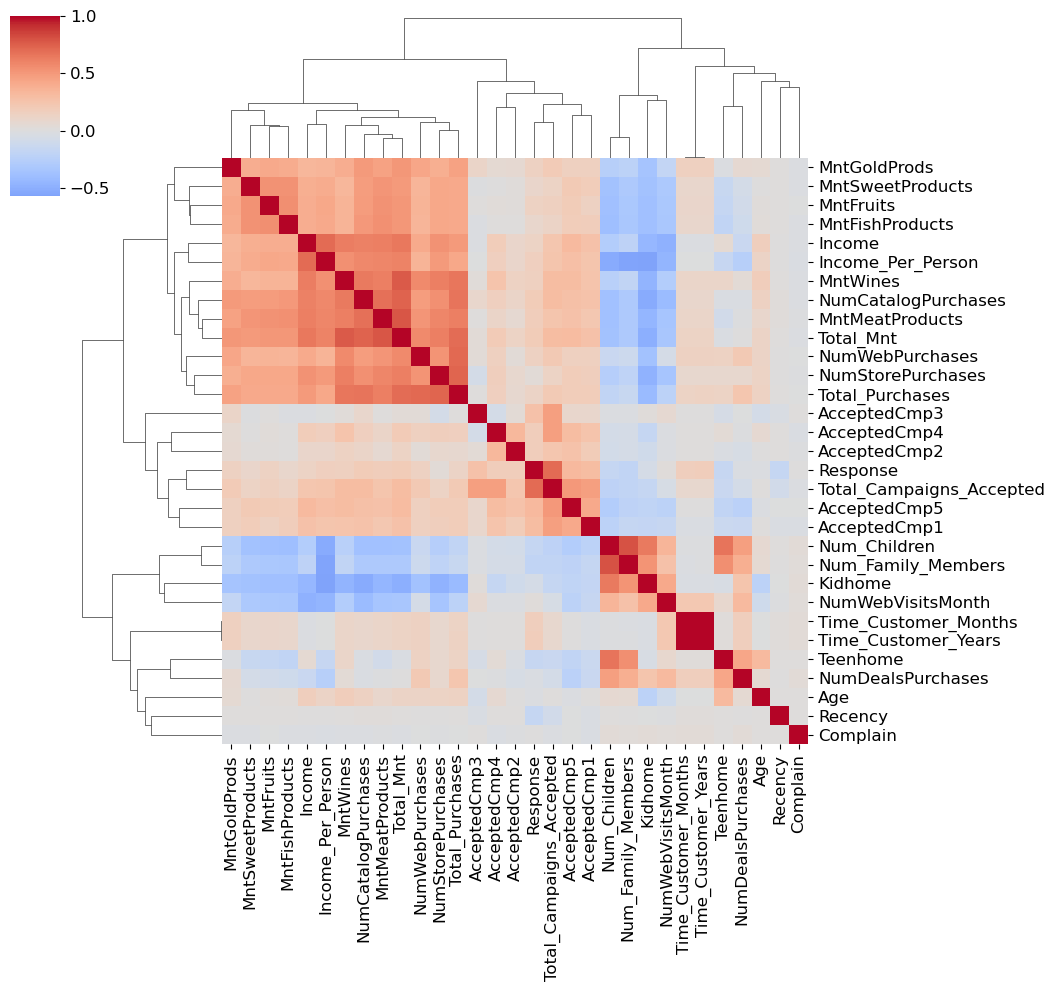

In [48]:
# Calculate correlation matrix using non-parametric test of correlation (Kendall)
corrs = ifood.drop(columns='ID').select_dtypes(include=np.number).corr(method='kendall')

# Plot clustered heatmap of correlations
plt.figure(figsize=(10, 8))
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0)
plt.show()

##### Important note:

We can observe three clusters of correlated variables:

    1. HIGH INCOME: Income, amount spent on products, and number of purchases show a moderate positive correlation.
    2. CAMPAIGNS: Acceptance of campaigns exhibits a moderate positive correlation.
    3. PARENTS: There is a moderate negative correlation between spending on products and the number of children. Surprisingly, the number of purchases shows a moderate positive correlation with the number of children.


Anomalies:

    1. 'NumWebVisitsMonth' does not correlate with an increased number of web purchases 'NumWebPurchases', but is positively correlated with 'NumDealsPurchases', suggesting that deals are an effective way to stimulate purchases on the website.

Saving figure total_mnt_income_effect


<Figure size 640x480 with 0 Axes>

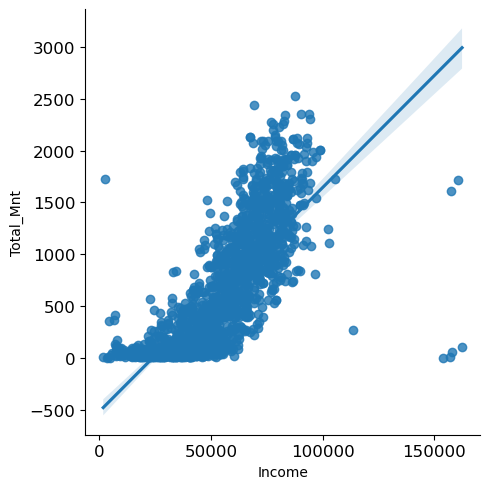

In [49]:
# Relationship between 'Total_Mnt' and 'Income'
save_fig('total_mnt_income_effect')
sns.lmplot(x='Income', y='Total_Mnt', data=ifood[ifood['Income'] < 200000])

Saving figure total_mnt_income_per_person_effect


<Figure size 640x480 with 0 Axes>

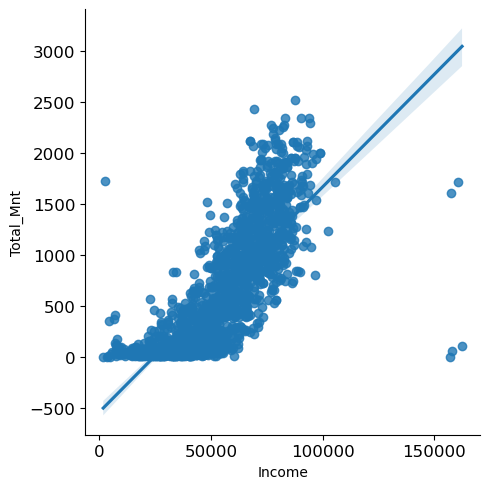

In [50]:
# Relationship between 'Total_Mnt' and 'Income_Per_Person'
save_fig('total_mnt_income_per_person_effect')
sns.lmplot(x='Income', y='Total_Mnt', data=ifood[ifood['Income_Per_Person'] < 100000])

Saving figure campaigns_income_plot


<Figure size 640x480 with 0 Axes>

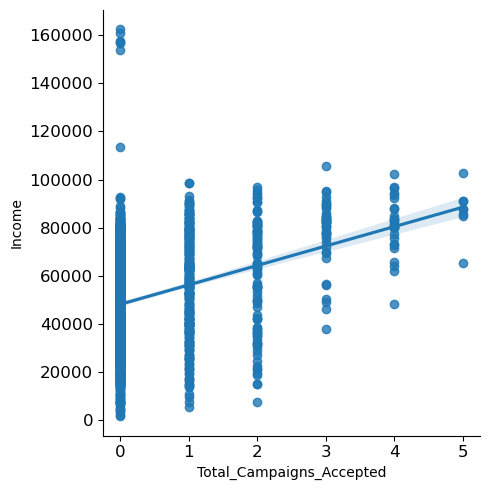

In [51]:
# Relationship between 'Total_Campaigns_Accepted' and 'Income'

save_fig('campaigns_income_plot')
sns.lmplot(x='Total_Campaigns_Accepted', y='Income', data=ifood)

Saving figure children_deals_plot


<Figure size 640x480 with 0 Axes>

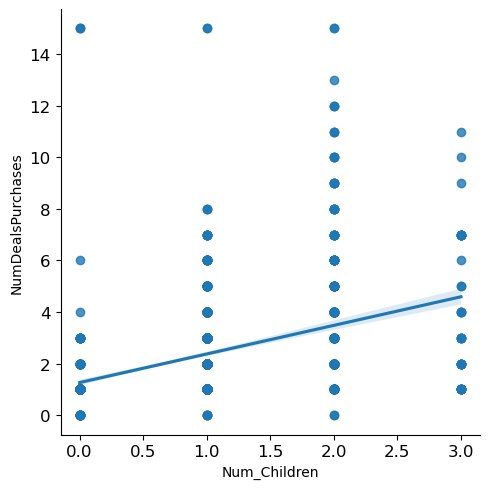

In [52]:
# Relationship between 'Num_Children' and 'NumDealsPurchases'

save_fig('children_deals_plot')
sns.lmplot(x='Num_Children', y='NumDealsPurchases', data=ifood)

In [53]:
# Checking correlation with target

corr = ifood.corrwith(ifood["Response"])
corr = corr.reset_index(name='corr value')
corr["Corr Type"] = corr["corr value"].apply(lambda x : "Positive" if x >= 0 else "Negative")
corr["corr value"] = corr["corr value"].apply(lambda x : abs(x))
corr.sort_values('corr value', ascending=False, ignore_index=True)

C:\Users\andre\AppData\Local\Temp\ipykernel_7960\3362051779.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



index  corr value Corr Type
0                   Response    1.000000  Positive
1   Total_Campaigns_Accepted    0.727315  Positive
2               AcceptedCmp5    0.320623  Positive
3               AcceptedCmp1    0.297717  Positive
4          Income_Per_Person    0.276801  Positive
5               AcceptedCmp3    0.274044  Positive
6                  Total_Mnt    0.257425  Positive
7                   MntWines    0.242704  Positive
8            MntMeatProducts    0.226602  Positive
9        NumCatalogPurchases    0.209127  Positive
10        Num_Family_Members    0.207242  Negative
11       Time_Customer_Years    0.204431  Positive
12      Time_Customer_Months    0.203778  Positive
13                   Recency    0.200762  Negative
14              AcceptedCmp2    0.176337  Positive
15              AcceptedCmp4    0.175754  Positive
16              Num_Children    0.162596  Negative
17                  Teenhome    0.154985  Negative
18                    Income    0.150973  Positive
19           NumWebPurchases    0.147973  Positive
20                 MntFruits    0.141680  Positive
21           Total_Purchases    0.139066  Positive
22              MntGoldProds    0.125666  Positive
23           MntFishProducts    0.105854  Positive
24          MntSweetProducts    0.100482  Positive
25                   Kidhome    0.070301  Negative
26                        ID    0.037454  Negative
27         NumStorePurchases    0.020879  Positive
28                       Age    0.019325  Negative
29         NumWebVisitsMonth    0.009368  Positive
30         NumDealsPurchases    0.006070  Negative
31                  Complain    0.004962  Positive

C:\Users\andre\AppData\Local\Temp\ipykernel_7960\2630869892.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Saving figure correlation_with_response


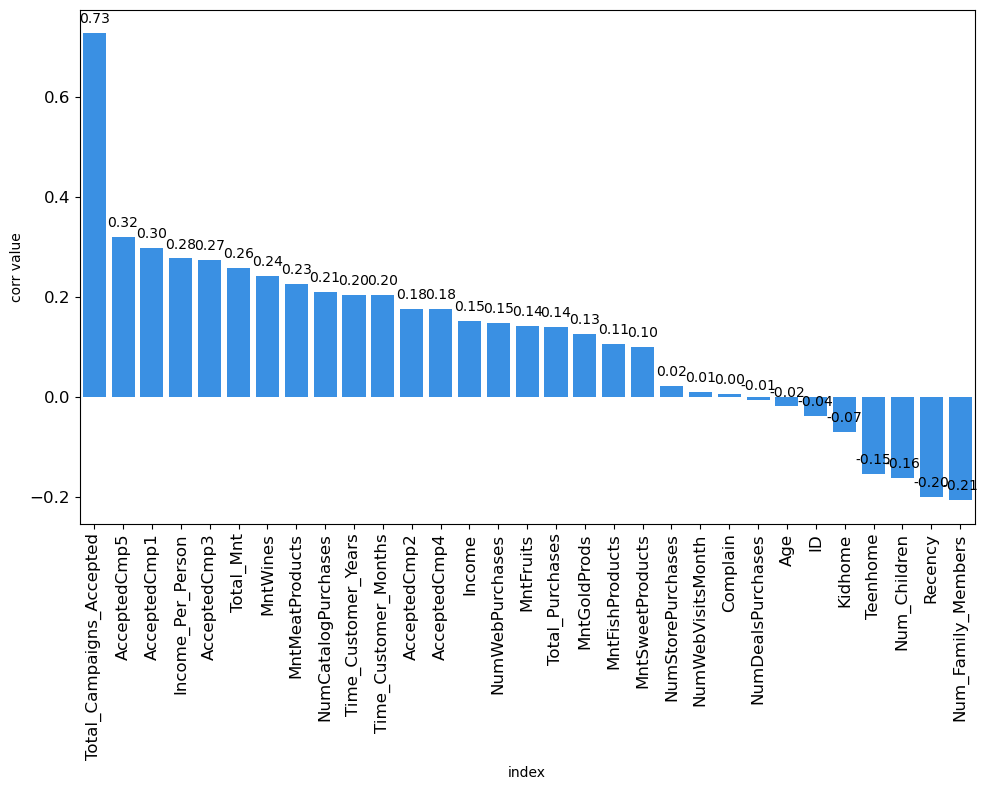

In [54]:
corr = ifood.corrwith(ifood["Response"])
corr = corr.reset_index(name='corr value')
corr = corr.sort_values('corr value', ascending=False)[1:]

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='index', y="corr value", data=corr, order=corr["index"], color='dodgerblue')
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():0.2f}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', 
        va = 'center', 
        xytext = (0, 10), 
        fontsize=10,
        textcoords = 'offset points')
plt.xticks(rotation=90)
save_fig("correlation_with_response")
plt.show()

In [55]:
cat = ['Education', 'Marital_Status','Kidhome','Teenhome']

dfg_all = pd.DataFrame()

for category in cat:
    # Group data by 'Education', 'Marital_Status', 'Kidhome', and 'Teenhome' and 'Response'
    dfg1 = ifood.groupby([category, "Response"]).agg({"ID":"nunique"}).reset_index()
    dfg1.rename(columns={"ID":"Nº Customers"}, inplace=True)

    # Group data by 'Education', 'Marital_Status', 'Kidhome', and 'Teenhome'
    dfg2 = ifood.groupby([category]).agg({"ID":"nunique"}).reset_index()
    dfg2.rename(columns={"ID":"Total Customers"}, inplace=True)

    # Merge data
    dfg = dfg1.merge(dfg2, on=category)

    # Calculate ratio
    dfg["ratio"] = (dfg["Nº Customers"]/dfg["Total Customers"])*100

    # Change 1 and 0 category to Yes and No
    dfg["Response"] = dfg["Response"].apply(lambda x: "Yes" if x == 1 else "No")
    dfg["Category"] = category
    dfg.rename(columns={category: "Type"}, inplace=True)
    
    # Filter only rows with 'Response' == 'Yes'
    dfg = dfg[dfg["Response"] == "Yes"].copy()
    
    # Sort by ratio in descending order
    dfg.sort_values(by=['ratio'], ascending=False, inplace=True)
    
    # Concatenate the dataframes
    dfg_all = pd.concat([dfg_all, dfg], axis=0)

dfg_all.set_index(['Category', 'Type', 'Response'])

Nº Customers  Total Customers      ratio
Category       Type       Response                                          
Education      PhD        Yes                 76              380  20.000000
               Master     Yes                 44              301  14.617940
               Graduation Yes                120              875  13.714286
               2n Cycle   Yes                 21              159  13.207547
               Basic      Yes                  2               47   4.255319
Marital_Status Widow      Yes                 15               59  25.423729
               Single     Yes                 82              374  21.925134
               Divorced   Yes                 36              182  19.780220
               Married    Yes                 83              695  11.942446
               Together   Yes                 47              452  10.398230
Kidhome        0          Yes                172             1017  16.912488
               1          Yes                 89              708  12.570621
               2          Yes                  2               37   5.405405
Teenhome       0          Yes                187              913  20.481928
               2          Yes                  4               44   9.090909
               1          Yes                 72              805   8.944099

##### Important note:
    1. PhD, Master and Gratuation's degrees have high response rates, each with a response ratio of over 13.4% (maximum 20%).
    2. Widow, Single and Divorced statuses have high response rates.
    3. The more children/teenagers a customer has, the lower the likelihood of them responding to the marketing campaign. 

In [56]:
import math

cat = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Complain']

n=2
fig = plt.figure(figsize=(15, 10))
for i in range(0, len(cat)):
    ax = fig.add_subplot(n, math.ceil(len(cat)/n), i+1)
    bar = sns.countplot(x=ifood[cat[i]], hue=ifood["Response"], palette=ifood_colors, orient='h')
    for patch in bar.patches:
        bar.annotate(format(patch.get_height(), '.0f'),
                     (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                     ha = 'center', va = 'center', 
                     xytext = (0, 5), 
                     textcoords = 'offset points')
    sns.color_palette("YlOrBr")
    plt.xticks(rotation=0)
    y_start, y_end = ax.get_ylim()
    ax.set_ylim(0, y_end+50)
    plt.ylabel('Number of Customers',fontsize=13)
    plt.tight_layout()

##### Important note: 
   
The campaign acceptance (target) tends to be based on those who have accepted previous campaigns and have not complained.

In [57]:
fig = plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.pie(ifood["Response"].value_counts(),
        labels = ['No Response', 'Response'], 
        autopct = '%.1f%%', 
        radius = 1, 
        colors=ifood_colors,
        textprops={'fontsize': 10, 'fontweight': 'bold'})
plt.title('Response Outcome Pie Chart', fontsize = 10, fontweight = 'bold')

plt.subplot(122)
resp = ifood["Response"].apply(lambda x: "No Response" if x == 0 else "Response")
t = sns.countplot(x=resp, palette=ifood_colors)
t.set_xlabel(None, fontweight = 'bold', fontsize = 10)
t.set_ylabel('Count', fontweight = 'bold', fontsize = 10)

plt.title('Response Outcome Distributions', fontsize = 10, fontweight = 'bold')
save_fig("response_distribuition")
plt.tight_layout()

Saving figure response_distribuition


In [58]:
# Acceptance of campaings

campaigns = ifood.copy()

# Membuat Acceptance Rate dari setiap campaign
camp = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'] 

for i in camp:
    campaigns[i] = campaigns[i].apply(lambda x: 1 if x == 1 else 0)

nm = []
acc_pp = []

for i, val in enumerate(camp):
    acc = (campaigns[val].astype("int64").sum()/campaigns.shape[0]) * 100
    nm.append(i+1)
    acc_pp.append(acc)

acceptance = pd.DataFrame({'Campaign': nm, 'Acceptance Percentage': acc_pp})
acceptance

Campaign  Acceptance Percentage
0         1               6.469921
1         2               1.305335
2         3               7.491487
3         4               7.321226
4         5               7.037457

In [59]:
# Acceptance of campaigns

plt.figure(figsize=(10, 3))
line = sns.lineplot(x="Campaign", y="Acceptance Percentage", data=acceptance, 
                    marker='o', color='orange', markersize=7, markerfacecolor='red')

# label points on the plot
for x, y in zip(acceptance["Campaign"], acceptance["Acceptance Percentage"]):
    plt.text(x = x, y = y+0.7, s = "{:.1f}".format(y), color = "white", size=8, fontweight="bold").set_backgroundcolor("red")
    
# Set plot title and axes labels
plt.title('Acceptance Percentage in Different Campaign')
plt.xlabel('Campaign')
plt.ylabel('% Acceptance Percentage')
plt.ylim(0, max(acceptance["Acceptance Percentage"])+2)

plt.xticks(np.arange(1, 6, step=1))

plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_7960\1773394916.py:5: UserWarning:

The palette list has more values (8) than needed (2), which may not be intended.



Saving figure number_customers_response_age


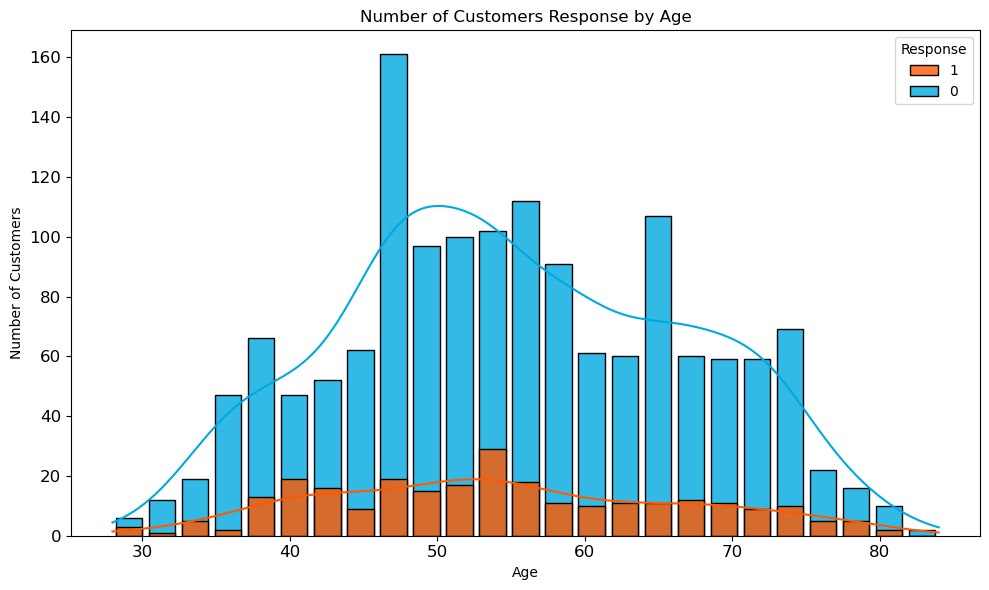

In [60]:
# Age and Response

fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(data=ifood, x='Age', hue='Response', 
             palette=ifood_colors, alpha=0.8,
             kde=True, bins=25, shrink=0.8,
             hue_order=[1, 0])
ax.set_xlabel('Age')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers Response by Age')

plt.tight_layout()
save_fig("number_customers_response_age")
plt.show()

##### Important note:

The category of customers who received the most responses to the latest marketing campaign are those born between 1970-1975 (39-44 years old) and 1980-1990 (24-34 years old).

In [61]:
# Group data by Education-Response
dfg1 = ifood.groupby(["Education", "Response"]).agg({"ID":"nunique"}).reset_index()
dfg1.rename(columns={"ID":"Nº Customers"}, inplace=True)

# Group data by Education
dfg2 = ifood.groupby(["Education"]).agg({"ID":"nunique"}).reset_index()
dfg2.rename(columns={"ID":"Total Customers"}, inplace=True)

# Merge data
df_edu = dfg1.merge(dfg2, on="Education")

# Calculate ratio
df_edu["ratio"] = (df_edu["Nº Customers"]/df_edu["Total Customers"])*100

order = ['Basic', 'Graduation', 'Master', 'PhD']
df_edu = df_edu.set_index("Education").loc[order].reset_index()
df_edu

Education  Response  Nº Customers  Total Customers      ratio
0       Basic         0            45               47  95.744681
1       Basic         1             2               47   4.255319
2  Graduation         0           755              875  86.285714
3  Graduation         1           120              875  13.714286
4      Master         0           257              301  85.382060
5      Master         1            44              301  14.617940
6         PhD         0           304              380  80.000000
7         PhD         1            76              380  20.000000

In [62]:
# Education and Response

plt.figure(figsize=(10, 5))

ax = sns.barplot(x="Education", y="Nº Customers", 
                 data=df_edu, hue="Response",
                 palette=ifood_colors)

# Set values label annotation
for p in ax.patches:
    ncus = df_edu[df_edu["Nº Customers"] == p.get_height()]["ratio"].values[0]
    ax.annotate(
        '{:.1f}%'.format(ncus), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', 
        xytext=(0, 10), 
        fontsize=13,
        textcoords='offset points')

# Set title
plt.ylabel('Number of Customers', fontsize=14)
plt.xlabel(' ', fontsize=14)
plt.title("Comparison of response in Education")

# Setting ticks
plt.tick_params(axis='both', which='major', labelsize=13)

# Settings legend
lg = plt.legend(title="Response", prop={"size": 11})
title = lg.get_title()
title.set_fontsize(12)
plt.ylim(0, max(df_edu["Nº Customers"])+100)

plt.tight_layout()
save_fig("response_education_comparison")
plt.show()

Saving figure response_education_comparison


In [63]:
# Group data by Marital_Status-Response
dfg1 = ifood.groupby(["Marital_Status", "Response"]).agg({"ID":"nunique"}).reset_index()
dfg1.rename(columns={"ID":"Nº Customers"}, inplace=True)

# Group data by Marital_Status_Simple
dfg2 = ifood.groupby(["Marital_Status"]).agg({"ID":"nunique"}).reset_index()
dfg2.rename(columns={"ID":"Total Customers"}, inplace=True)

# Merge data
df_mar = dfg1.merge(dfg2, on="Marital_Status")

# Calculate ratio
df_mar["ratio"] = (df_mar["Nº Customers"]/df_mar["Total Customers"])*100

order = ['Together', 'Married', 'Divorced', 'Widow', 'Single']
df_mar = df_mar.set_index("Marital_Status").loc[order].reset_index()
df_mar


Marital_Status  Response  Nº Customers  Total Customers      ratio
0       Together         0           405              452  89.601770
1       Together         1            47              452  10.398230
2        Married         0           612              695  88.057554
3        Married         1            83              695  11.942446
4       Divorced         0           146              182  80.219780
5       Divorced         1            36              182  19.780220
6          Widow         0            44               59  74.576271
7          Widow         1            15               59  25.423729
8         Single         0           292              374  78.074866
9         Single         1            82              374  21.925134

Saving figure response_marital_status


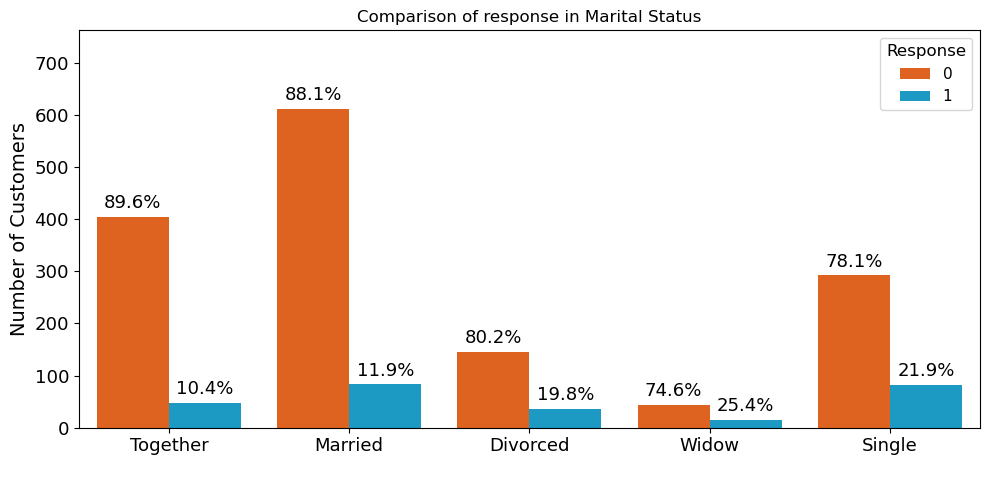

In [64]:
# Marital Status and Response

plt.figure(figsize=(10, 5))

ax = sns.barplot(x="Marital_Status", y="Nº Customers", 
                 data=df_mar, hue="Response",
                 palette=ifood_colors, order=order)

# Set values label annotation
for p in ax.patches:
    ncus = df_mar[df_mar["Nº Customers"] == p.get_height()]["ratio"].values[0]
    ax.annotate(
        '{:.1f}%'.format(ncus), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', 
        xytext=(0, 10), 
        fontsize=13,
        textcoords='offset points')

# Set title
plt.ylabel('Number of Customers', fontsize=14)
plt.xlabel(' ', fontsize=14)
plt.title("Comparison of response in Marital Status")

# Setting ticks
plt.tick_params(axis='both', which='major', labelsize=13)

# Settings legend
lg = plt.legend(title="Response", prop={"size": 11})
title = lg.get_title()
title.set_fontsize(12)
plt.ylim(0, max(df_mar["Nº Customers"])+150)

plt.tight_layout()
save_fig("response_marital_status")
plt.show()

Saving figure customers_children_response


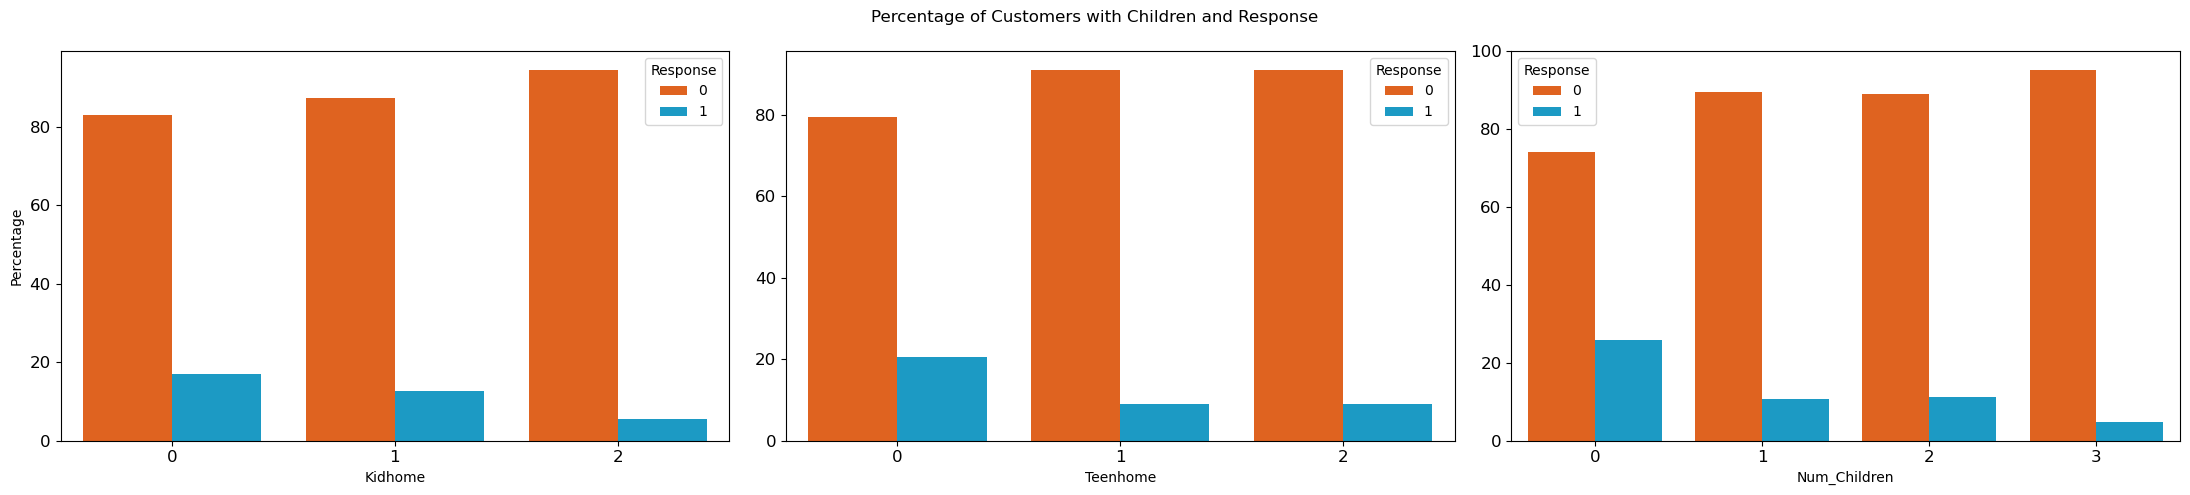

In [65]:
# Num of Children and Response

children = ['Kidhome', 'Teenhome', 'Num_Children']

fig = plt.figure(figsize=(22, 5))

for idx, i in enumerate(children):
    ax = fig.add_subplot(1, 3, idx+1)
    df_temp = ifood.groupby([i, 'Response'])['ID'].count().reset_index()
    df_temp_2 = ifood.groupby([i])['ID'].count().reset_index()
    df_merge = df_temp.merge(df_temp_2, on=i, how='inner')
    df_merge.columns = [i, 'Response', 'CountCust', 'TotalCust']
    df_merge['Percentage'] = df_merge['CountCust'] / df_merge['TotalCust'] * 100
    
    sns.barplot(x=i, y='Percentage', data=df_merge, hue='Response', palette=ifood_colors)
    if idx != 0:
        ax.set_ylabel(None)

plt.tight_layout()
fig.suptitle("Percentage of Customers with Children and Response")
save_fig("customers_children_response")
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_7960\3243660502.py:5: UserWarning:

The palette list has more values (8) than needed (2), which may not be intended.



Saving figure recency_response


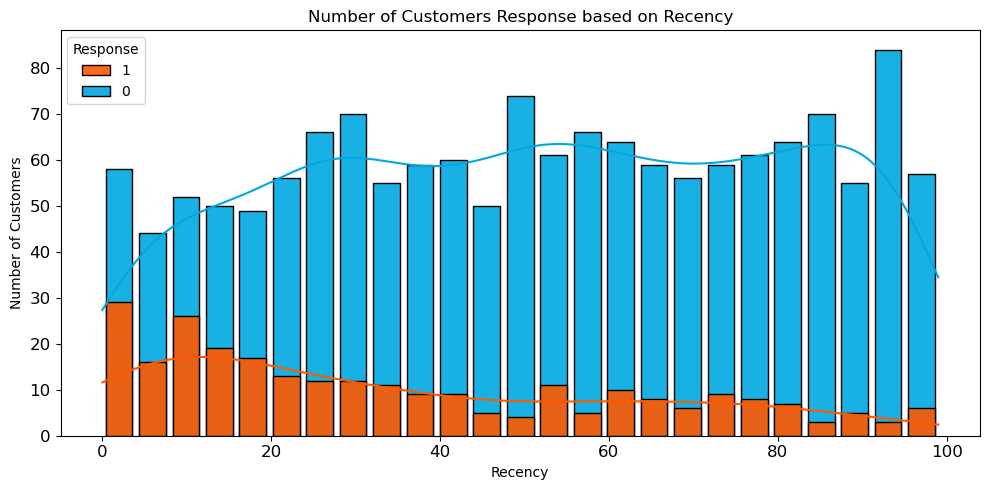

In [66]:
# Recency and Response

fig = plt.figure(figsize = (10, 5))

ax = sns.histplot(data=ifood, x='Recency', hue='Response', 
             palette=ifood_colors, alpha=0.9,
             kde = True, 
             bins = 25, shrink = 0.8,
            hue_order=[1,0])
plt.xlabel('Recency')
plt.ylabel('Number of Customers')
plt.title('Number of Customers Response based on Recency')

plt.tight_layout()
save_fig("recency_response")
plt.show()

##### Important note:

Based on recency (the time since the customer's last purchase), the lower the recency, the greater the likelihood that the customer will respond positively to the company's latest marketing campaign (Response). 

C:\Users\andre\AppData\Local\Temp\ipykernel_7960\4268406572.py:5: UserWarning:

The palette list has more values (8) than needed (2), which may not be intended.



Saving figure response_income_per_person


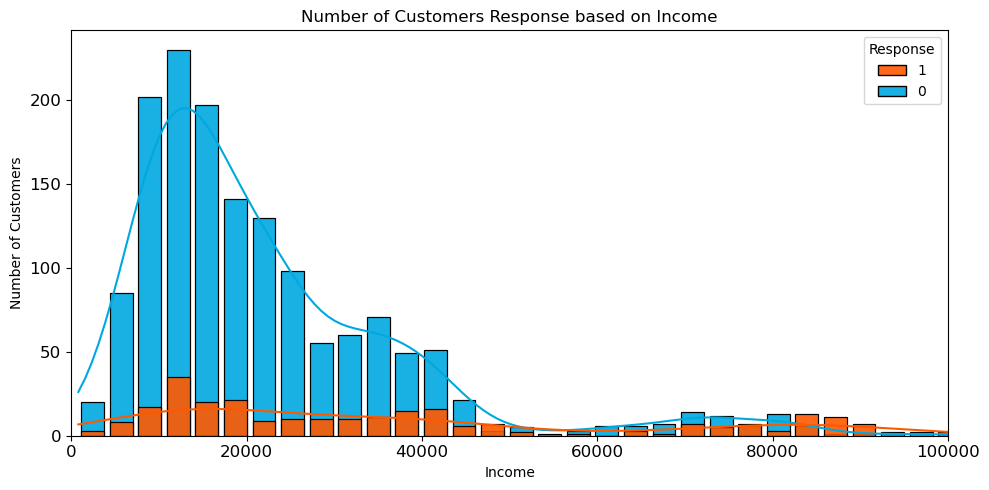

In [67]:
#  Response and Income per person

fig = plt.figure(figsize = (10, 5))

ax = sns.histplot(data=ifood, x='Income_Per_Person', hue='Response', 
             palette=ifood_colors, alpha=0.9,
             kde = True, shrink = 0.8,
            hue_order=[1,0])
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.title('Number of Customers Response based on Income')

plt.xlim(0, 100000)

plt.tight_layout()
save_fig("response_income_per_person")
plt.show()

Saving figure purchase_response


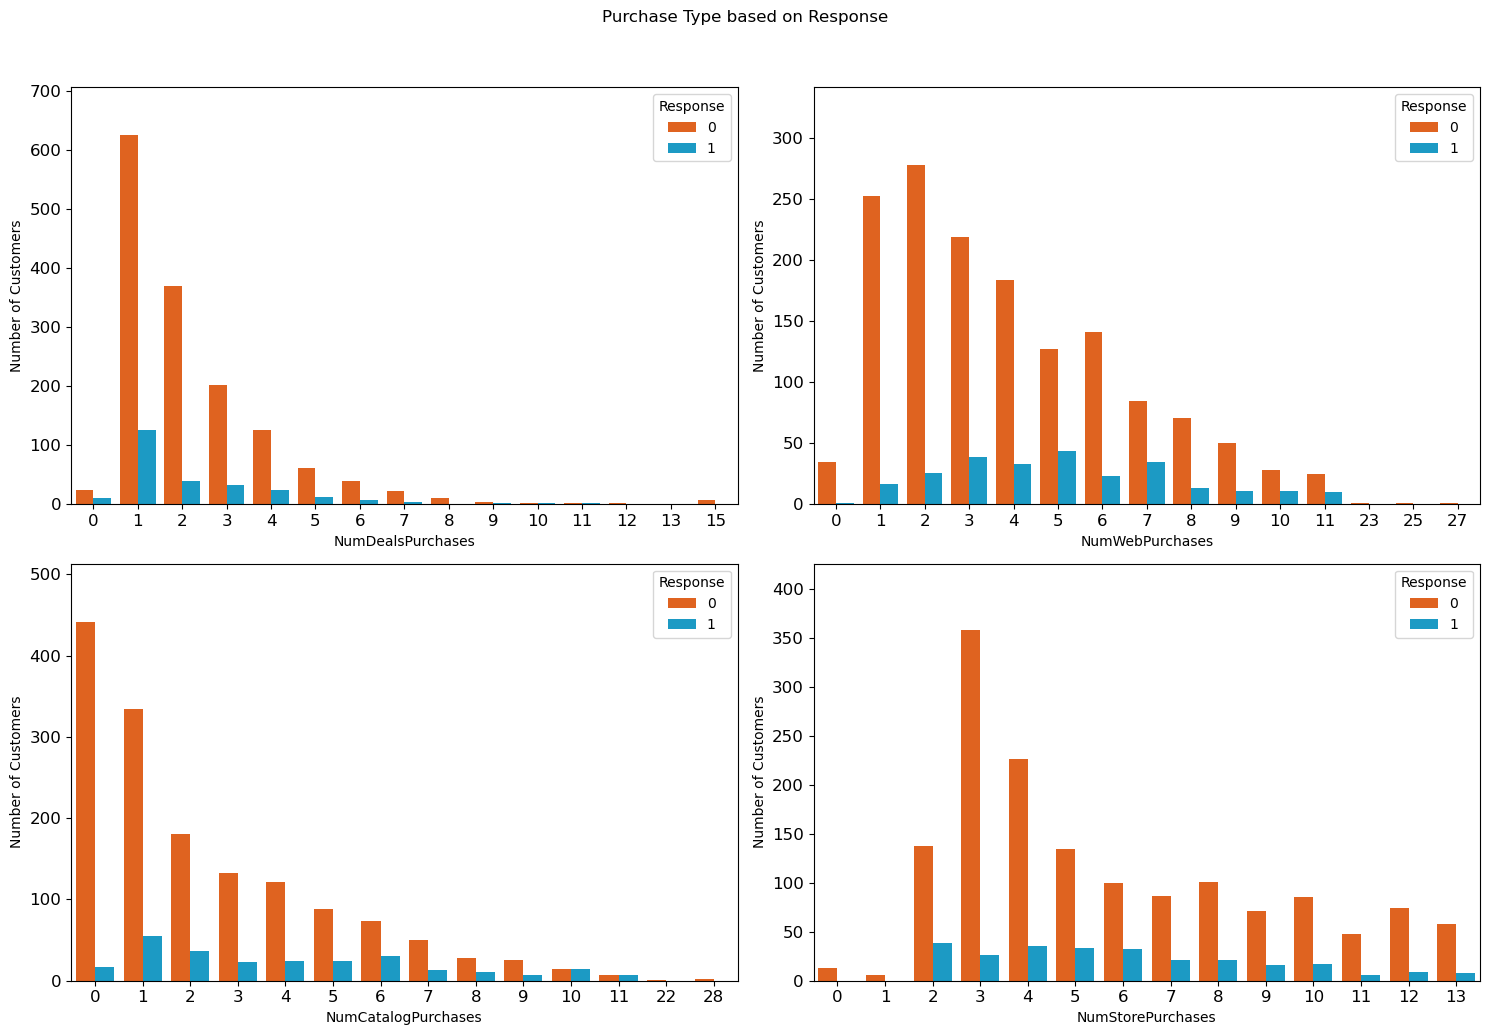

In [68]:
purchase_type = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

n=2
fig = plt.figure(figsize=(15, 10))
for i in range(0, len(purchase_type)):
    fig.add_subplot(n, math.ceil(len(purchase_type)/n), i+1)
    bar = sns.countplot(x=ifood[purchase_type[i]], hue=ifood["Response"], palette=ifood_colors, orient='h')

    y_start, y_end = plt.ylim()
    plt.ylim(0, y_end+50)
    plt.ylabel('Number of Customers')
    plt.tight_layout()
    
fig.suptitle("Purchase Type based on Response", y=1.03)
save_fig("purchase_response")

C:\Users\andre\AppData\Local\Temp\ipykernel_7960\3046034278.py:3: UserWarning:

The palette list has more values (8) than needed (2), which may not be intended.



Saving figure income_total_amount_response


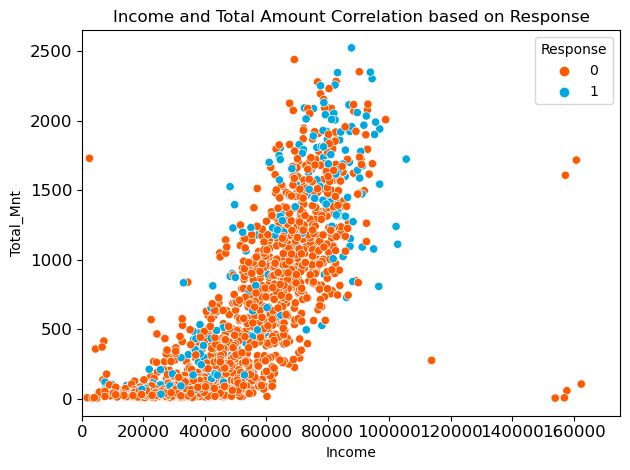

In [69]:
# Response and Total_Mnt

sns.scatterplot(x="Income",y='Total_Mnt', hue = 'Response', data=ifood, palette=ifood_colors)
plt.title("Income and Total Amount Correlation based on Response")
plt.xlim(0, 175000)
save_fig("income_total_amount_response")

Income and spending have a positive correlation with response, where higher income and spending values correspond to higher response rates

In [70]:
categ_cols = ['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 
              'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain']
              
numeric_cols = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
                'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Time_Customer_Months', 
                'Time_Customer_Years', 'Age', 'Total_Mnt', 'Total_Purchases', 'Total_Campaigns_Accepted',
                'Income_Per_Person', 'Num_Children', 'Num_Family_Members']

In [71]:
from scipy.stats import kruskal

# Kruskal-Wallis test between response
for col in numeric_cols:
    groups = [ifood.loc[ifood['Response'] == response, col] for response in ifood['Response'].unique()]
    kw_results = kruskal(*groups)
    print("Kruskal-Wallis Test for", col)
    print("H-statistic:", kw_results.statistic)
    print("p-value:", kw_results.pvalue)
    print()

Kruskal-Wallis Test for Income
H-statistic: 41.16998242092995
p-value: 1.3954927691084235e-10

Kruskal-Wallis Test for Kidhome
H-statistic: 8.158104834609194
p-value: 0.004286914486359607

Kruskal-Wallis Test for Teenhome
H-statistic: 44.9874827240623
p-value: 1.982979544974306e-11

Kruskal-Wallis Test for Recency
H-statistic: 71.31345357947157
p-value: 3.047507198743469e-17

Kruskal-Wallis Test for MntWines
H-statistic: 63.100828604965095
p-value: 1.963914726139717e-15

Kruskal-Wallis Test for MntFruits
H-statistic: 49.961363835615266
p-value: 1.5680331307973504e-12

Kruskal-Wallis Test for MntMeatProducts
H-statistic: 78.6226185747593
p-value: 7.518363943102825e-19

Kruskal-Wallis Test for MntFishProducts
H-statistic: 19.286156016200223
p-value: 1.1251924142454603e-05

Kruskal-Wallis Test for MntSweetProducts
H-statistic: 25.672990748421448
p-value: 4.0444816650843207e-07

Kruskal-Wallis Test for MntGoldProds
H-statistic: 52.30007396601824
p-value: 4.763565216566177e-13

Kruskal-Wall

Categories with significant differences are: Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumWebPurchases, NumCatalogPurchases, Time_Customer_Months, Time_Customer_Years, Total_Mnt, Total_Purchases, Total_Campaigns_Accepted, Income_Per_Person, Num_Children, Num_Family_Members.

In [72]:
from scipy.stats import chi2_contingency

# Substitua 'response_column' pelo nome da sua coluna de resposta binária
response_column = 'Response'

# Loop através das colunas binárias
for col in categ_cols:
    # Crie uma tabela de contingência entre a coluna binária e a variável de resposta
    observed = pd.crosstab(ifood[col], ifood[response_column])
    
    # Execute o teste de qui-quadrado
    chi2, p, dof, expected = chi2_contingency(observed)
    
    # Exiba os resultados
    print(f'Chi-square test for {col} vs {response_column}:')
    print(f'Chi-square statistic: {chi2}')
    print(f'P-value: {p}')
    print('\n')

Chi-square test for Education vs Response:
Chi-square statistic: 13.322797027870248
P-value: 0.009801655556600843


Chi-square test for Marital_Status vs Response:
Chi-square statistic: 35.09514967343934
P-value: 4.4409124326497045e-07


Chi-square test for AcceptedCmp3 vs Response:
Chi-square statistic: 129.4208374644444
P-value: 5.4861412198321974e-30


Chi-square test for AcceptedCmp4 vs Response:
Chi-square statistic: 52.55003436510352
P-value: 4.194254093698611e-13


Chi-square test for AcceptedCmp5 vs Response:
Chi-square statistic: 177.63154828865976
P-value: 1.5942923691237924e-40


Chi-square test for AcceptedCmp1 vs Response:
Chi-square statistic: 152.79799475422757
P-value: 4.2405387909647395e-35


Chi-square test for AcceptedCmp2 vs Response:
Chi-square statistic: 50.51604394113474
P-value: 1.1819458662991877e-12


Chi-square test for Complain vs Response:
Chi-square statistic: 0.0
P-value: 1.0




Significant differences were found in the following categories: Education, Marital_Status, AccpetedCmp (all of them)

________________________________________________________________________________________________________________________________

## 1.5 Preprocessing for modeling

In [73]:
ifood_pr = ifood.drop('Response', axis=1) # drop labels (target) for training set
ifood_label = ifood['Response'].copy()

### 1.5.1 Dealing with categorical columns

In [74]:
# Creating new binary columns for each education category, considering the hierarchy
ifood_pr['Education_Basic'] = ifood_pr['Education'].apply(lambda x: 1 if x in ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'] else 0)
ifood_pr['Education_2n_Cycle'] = ifood_pr['Education'].apply(lambda x: 1 if x in ['2n Cycle', 'Graduation', 'Master', 'PhD'] else 0)
ifood_pr['Education_Graduation'] = ifood_pr['Education'].apply(lambda x: 1 if x in ['Graduation', 'Master', 'PhD'] else 0)
ifood_pr['Education_Master'] = ifood_pr['Education'].apply(lambda x: 1 if x in ['Master', 'PhD'] else 0)
ifood_pr['Education_PhD'] = ifood_pr['Education'].apply(lambda x: 1 if x == 'PhD' else 0)

# Checking the result
ifood_pr[['Education', 'Education_Basic', 'Education_2n_Cycle', 'Education_Graduation', 'Education_Master', 'Education_PhD']].head()

Education  Education_Basic  Education_2n_Cycle  Education_Graduation  \
1090       PhD                1                   1                     1   
15         PhD                1                   1                     1   
873   2n Cycle                1                   1                     0   
610     Master                1                   1                     1   
657   2n Cycle                1                   1                     0   

      Education_Master  Education_PhD  
1090                 1              1  
15                   1              1  
873                  0              0  
610                  1              0  
657                  0              0

In [75]:
from sklearn.preprocessing import OneHotEncoder

ifood_pr = pd.get_dummies(ifood_pr, columns=['Marital_Status'], prefix=['Marital_Status'])
ifood_pr

ID   Education    Income  Kidhome  Teenhome  Recency  MntWines  \
1090   1127         PhD   85844.0        0         0       62       938   
15     2114         PhD   82800.0        0         0       23      1006   
873     738    2n Cycle   42395.0        1         1       35        48   
610    7930      Master   26877.0        0         0       74       101   
657     946    2n Cycle   26490.0        0         0       92        45   
...     ...         ...       ...      ...       ...      ...       ...   
252   10089  Graduation  102692.0        0         0        5       168   
1128   8977       Basic   16581.0        0         0       51         1   
1223    938  Graduation   40211.0        1         1       30        51   
648    4679      Master   78710.0        0         1       42       721   
952    5320      Master   44051.0        1         1       20        79   

      MntFruits  MntMeatProducts  MntFishProducts  ...  Education_Basic  \
1090         19              843               25  ...                1   
15           22              115               59  ...                1   
873          13               57               24  ...                1   
610          13               76               20  ...                1   
657          47               52               21  ...                1   
...         ...              ...              ...  ...              ...   
252         148              444               32  ...                1   
1128          3                4                2  ...                1   
1223          1                7                2  ...                1   
648           0              152              119  ...                1   
952           7               58                6  ...                1   

      Education_2n_Cycle  Education_Graduation  Education_Master  \
1090                   1                     1                 1   
15                     1                     1                 1   
873                    1                     0                 0   
610                    1                     1                 1   
657                    1                     0                 0   
...                  ...                   ...               ...   
252                    1                     1                 0   
1128                   0                     0                 0   
1223                   1                     1                 0   
648                    1                     1                 1   
952                    1                     1                 1   

      Education_PhD  Marital_Status_Divorced  Marital_Status_Married  \
1090              1                        0                       1   
15                1                        0                       0   
873               0                        0                       0   
610               0                        0                       0   
657               0                        0                       0   
...             ...                      ...                     ...   
252               0                        1                       0   
1128              0                        0                       0   
1223              0                        0                       1   
648               0                        0                       1   
952               0                        1                       0   

      Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  
1090                      0                        0                     0  
15                        1                        0                     0  
873                       1                        0                     0  
610                       1                        0                     0  
657                       0                        1                     0  
...                     ...                      ...           

In [76]:
ifood_pr.drop(columns=['ID', 'Education'], inplace=True)

### 1.5.2 Standardization

In [77]:
from sklearn.preprocessing import StandardScaler

scaled_features = StandardScaler().fit_transform(ifood_pr.values)
scaled_features_ifood = pd.DataFrame(scaled_features, index=ifood_pr.index, columns=ifood_pr.columns)
scaled_features_ifood

Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
1090  1.562843 -0.825794 -0.925464  0.447231  1.879441  -0.185319   
15    1.423111 -0.825794 -0.925464 -0.894110  2.081117  -0.110116   
873  -0.431648  1.034882  0.900592 -0.481390 -0.760141  -0.335726   
610  -1.143989 -0.825794 -0.925464  0.859951 -0.602952  -0.335726   
657  -1.161754 -0.825794 -0.925464  1.479031 -0.769038   0.516578   
...        ...       ...       ...       ...       ...        ...   
252   2.336237 -0.825794 -0.925464 -1.513190 -0.404242   3.048421   
1128 -1.616619 -0.825794 -0.925464  0.068904 -0.899535  -0.586403   
1223 -0.531903  1.034882  0.900592 -0.653357 -0.751244  -0.636539   
648   1.235363 -0.825794  0.900592 -0.240636  1.235858  -0.661607   
952  -0.355631  1.034882  0.900592 -0.997290 -0.668200  -0.486132   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
1090         3.043361        -0.231311          1.653428     -0.106182  ...   
15          -0.230309         0.386467          0.998150      0.029463  ...   
873         -0.491123        -0.249481         -0.288135     -0.358092  ...   
610         -0.405684        -0.322161         -0.215327     -0.067426  ...   
657         -0.513607        -0.303991         -0.166788     -0.358092  ...   
...               ...              ...               ...           ...  ...   
252          1.249138        -0.104121          3.522183      2.025369  ...   
1128        -0.729454        -0.649220         -0.579370     -0.629380  ...   
1223        -0.715963        -0.649220         -0.627909     -0.358092  ...   
648         -0.063928         1.476664          0.561299      0.126351  ...   
952         -0.486627        -0.576540         -0.579370     -0.493736  ...   

      Education_Basic  Education_2n_Cycle  Education_Graduation  \
1090              0.0            0.165545              0.363855   
15                0.0            0.165545              0.363855   
873               0.0            0.165545             -2.748345   
610               0.0            0.165545              0.363855   
657               0.0            0.165545             -2.748345   
...               ...                 ...                   ...   
252               0.0            0.165545              0.363855   
1128              0.0           -6.040642             -2.748345   
1223              0.0            0.165545              0.363855   
648               0.0            0.165545              0.363855   
952               0.0            0.165545              0.363855   

      Education_Master  Education_PhD  Marital_Status_Divorced  \
1090          1.259909       1.907051                -0.339396   
15            1.259909       1.907051                -0.339396   
873          -0.793708      -0.524370                -0.339396   
610           1.259909      -0.524370                -0.339396   
657          -0.793708      -0.524370                -0.339396   
...                ...            ...                      ...   
252          -0.793708      -0.524370                 2.946408   
1128         -0.793708      -0.524370                -0.339396   
1223         -0.793708      -0.524370                -0.339396   
648           1.259909      -0.524370                -0.339396   
952           1.259909      -0.524370                 2.946408   

      Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
1090                1.239053              -0.519088                -0.587399   
15                 -0.807068               1.926455                -0.587399   
873                -0.807068               1.926455                -0.587399   
610                -0.807068               1.926455                -0.587399   
657                -0.807068              -0.519088                 1.702419   
...                      ...                    ...                      ...   
252                -0.807068              -0.519088                -0.58

### 1.5.3 Selecting variables (PCA)

In [78]:
from sklearn.decomposition import PCA

# Convert the data to a numpy array
X = np.array(ifood_pr)

# Calculate the covariance matrix
S = np.cov(X.T)

# Variances
variances = np.diagonal(S)

# Initialize and fit the PCA model
pca = PCA(n_components=8)
pca.fit(X)

# Get the weights of the principal components
principal_components = pca.components_[0]

# Variance of the principal components
pca.explained_variance_ratio_

# Print the variances
print("Variances:")
print(variances)

# Print the weights of the principal components
print("\nWeights of the principal components:")
print(principal_components)

# Print the variance of the principal components
print("\nVariance of the principal components:")
print(np.round(pca.explained_variance_ratio_,2))

Variances:
[4.74834132e+08 2.89004867e-01 3.00067163e-01 8.45858024e+02
 1.13751260e+05 1.59226589e+03 4.94811202e+04 3.03067288e+03
 1.69872588e+03 2.66465404e+03 3.70461558e+00 7.76719450e+00
 8.08519080e+00 1.05658430e+01 6.04420149e+00 6.93419859e-02
 6.78907545e-02 6.54591441e-02 6.05475812e-02 1.28902743e-02
 1.01170460e-02 4.44282225e+01 3.08587465e-01 1.36826791e+02
 3.59613936e+05 5.84532792e+01 7.97995219e-01 3.74689479e+08
 5.69394840e-01 8.25846423e-01 0.00000000e+00 2.59774622e-02
 1.03302672e-01 2.37250724e-01 1.69249105e-01 9.26751323e-02
 2.38992330e-01 1.67299949e-01 1.90829042e-01 3.23818308e-02]

Weights of the principal components:
[ 7.61446877e-01 -1.09577918e-05 -2.23323266e-06  1.63319346e-05
  8.23724413e-03  7.75080301e-04  5.90294163e-03  1.11347550e-03
  8.24936999e-04  7.15161451e-04 -1.36767959e-05  4.20841783e-05
  7.22037542e-05  7.10626563e-05 -6.04949292e-05 -1.18372539e-07
  2.01908633e-06  3.86518250e-06  3.09599876e-06  5.56174505e-07
 -9.07089199e-0

Saving figure scree_plot


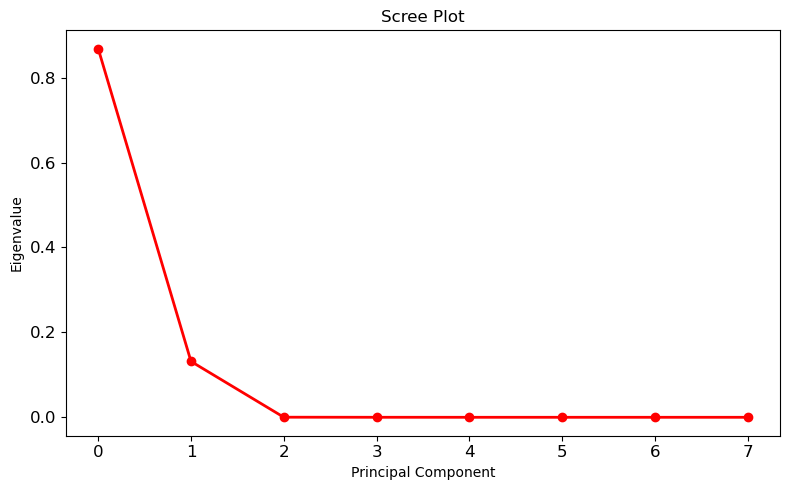

In [79]:
fig = plt.figure(figsize=(8,5))

plt.plot(pca.explained_variance_ratio_,  'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
save_fig("scree_plot")
plt.show()

Let's select two principal components because we can achieve 100% of explained variance. Great!

________________________________________________________________________________________________________________________________

## 1.6 Clustering

### 1.6.1 Finding the ideal number of clusters

In [80]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist

# Apply dimensionality reduction
pca = PCA(n_components=2).fit_transform(ifood_pr)

# Determining a range of K
k_range = range(1, 12)

# Applying the K-Means model for each value of K
k_means_var = [KMeans(n_clusters=k).fit(pca) for k in k_range]

# Fitting the cluster centroid for each model
centroids = [X.cluster_centers_ for X in k_means_var]

# Calculating the Euclidean distance from each data point to the centroid
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis=1) for ke in k_euclid]

# Sum of squares of distances within the cluster
intra_cluster_sum_of_squares = [sum(d**2) for d in dist]

# Total sum of squares
total_sum_of_squares = sum(pdist(pca)**2) / pca.shape[0]

# Sum of squares between clusters
inter_cluster_sum_of_squares = total_sum_of_squares - intra_cluster_sum_of_squares

C:\Users\andre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.

C:\Users\andre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.

C:\Users\and

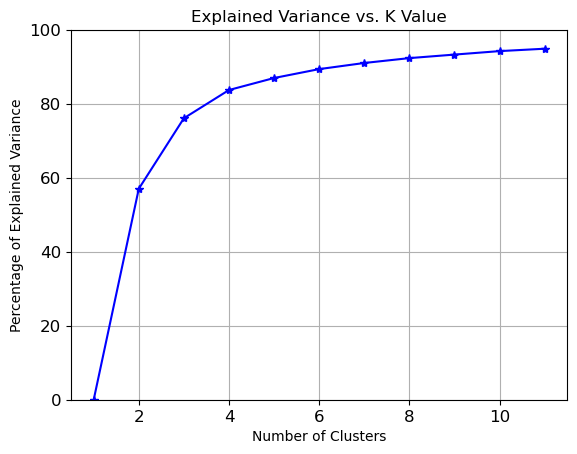

In [81]:
# Elbow Curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, inter_cluster_sum_of_squares / total_sum_of_squares * 100, 'b*-')
ax.set_ylim((0, 100))
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Percentage of Explained Variance')
plt.title('Explained Variance vs. K Value')
plt.show()

C:\Users\andre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.

C:\Users\andre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.

C:\Users\and

Saving figure elbow_wcss


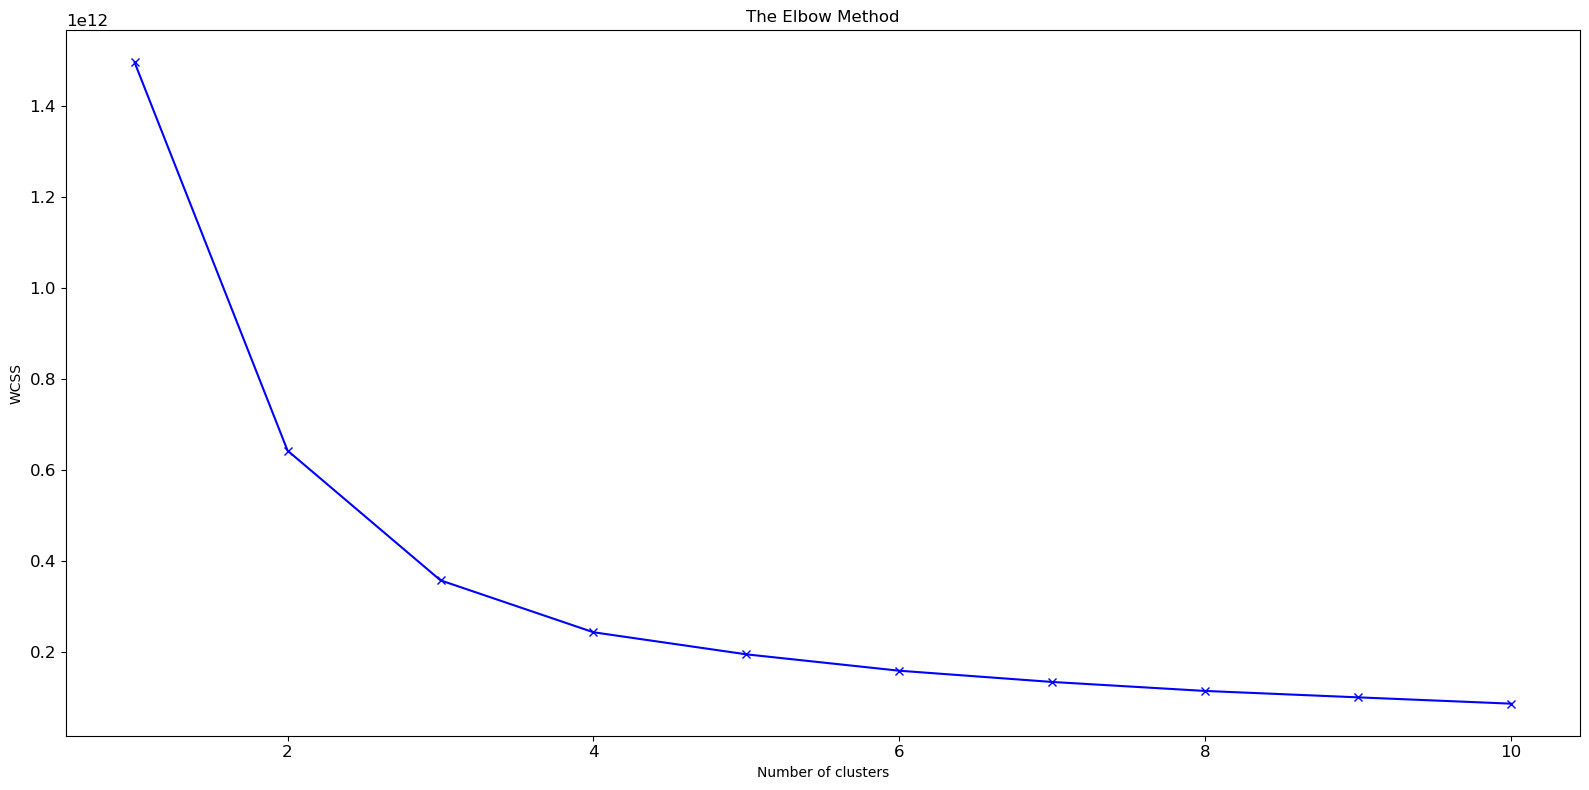

In [82]:
wcss=[]
for i in range (1,11):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
 kmeans.fit(pca)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
save_fig("elbow_wcss")
plt.show()

In [83]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 10):
    m1 = KMeans(n_clusters=i, random_state=42)
    labels = m1.fit_predict(pca)
    silhouette_scores.append(silhouette_score(pca, labels)) 

plt.bar(range(2, 10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize=20) 
plt.ylabel('Silhouette Score', fontsize=20) 
plt.show()

C:\Users\andre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.

C:\Users\andre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.

C:\Users\and

### 1.6.2 Model building

In [84]:
# Training a predicting using K-Means Algorithm.

kmeans=KMeans(n_clusters=3, random_state=42).fit(pca)
pred=kmeans.predict(pca)


# Appending those cluster value into main dataframe (without standard-scalar)
ifood['Cluster'] = pred + 1

C:\Users\andre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.



In [85]:
ifood.head()

ID Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
1090  1127       PhD        Married  85844.0        0         0       62   
15    2114       PhD         Single  82800.0        0         0       23   
873    738  2n Cycle         Single  42395.0        1         1       35   
610   7930    Master         Single  26877.0        0         0       74   
657    946  2n Cycle       Together  26490.0        0         0       92   

      MntWines  MntFruits  MntMeatProducts  ...  Time_Customer_Months  \
1090       938         19              843  ...                   118   
15        1006         22              115  ...                   136   
873         48         13               57  ...                   119   
610        101         13               76  ...                   127   
657         45         47               52  ...                   138   

      Time_Customer_Years  Age  Total_Mnt  Total_Purchases  \
1090                  9.8   51       1958               20   
15                   11.3   78       1315               26   
873                   9.9   43        182               12   
610                  10.6   55        268               12   
657                  11.5   66        210               11   

      Total_Campaigns_Accepted  Income_Per_Person  Num_Children  \
1090                         1       42922.000000             0   
15                           3       82800.000000             0   
873                          0       14131.666667             2   
610                          0       26877.000000             0   
657                          0       13245.000000             0   

      Num_Family_Members  Cluster  
1090                   2        1  
15                     1        2  
873                    3        3  
610                    1        3  
657                    2        3  

[5 rows x 35 columns]

Saving figure cluster_distribution


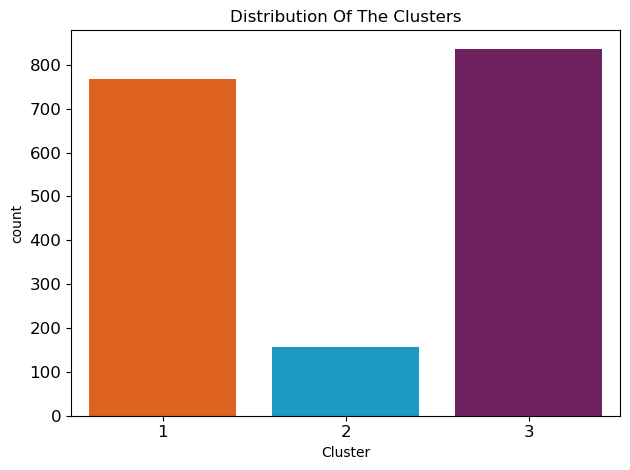

In [86]:
pl = sns.countplot(x=ifood["Cluster"], palette=ifood_colors)
pl.set_title("Distribution Of The Clusters")
save_fig('cluster_distribution')
plt.show()

In [87]:
# Kruskal-Wallis test between cluster
for col in numeric_cols:
    groups = [ifood.loc[ifood['Cluster'] == cluster, col] for cluster in ifood['Cluster'].unique()]
    kw_results = kruskal(*groups)
    print("Kruskal-Wallis Test for", col)
    print("H-statistic:", kw_results.statistic)
    print("p-value:", kw_results.pvalue)
    print()

Kruskal-Wallis Test for Income
H-statistic: 1343.1390430254469
p-value: 2.193120995757731e-292

Kruskal-Wallis Test for Kidhome
H-statistic: 620.5350207477522
p-value: 1.7886786811536868e-135

Kruskal-Wallis Test for Teenhome
H-statistic: 206.04957568380166
p-value: 1.8067711240126043e-45

Kruskal-Wallis Test for Recency
H-statistic: 2.2134928525870947
p-value: 0.3306329516520046

Kruskal-Wallis Test for MntWines
H-statistic: 1074.1476946065795
p-value: 5.646661340513513e-234

Kruskal-Wallis Test for MntFruits
H-statistic: 552.6339069877952
p-value: 9.932803439285282e-121

Kruskal-Wallis Test for MntMeatProducts
H-statistic: 978.8952547422022
p-value: 2.7264419295675007e-213

Kruskal-Wallis Test for MntFishProducts
H-statistic: 523.438155648724
p-value: 2.171944342968771e-114

Kruskal-Wallis Test for MntSweetProducts
H-statistic: 501.8130506359268
p-value: 1.0781534598029534e-109

Kruskal-Wallis Test for MntGoldProds
H-statistic: 463.95327544589327
p-value: 1.7940159771039206e-101

Kru

These results indicate that most of the variables exhibit significant differences across different clusters, except for Recency, Time_Customer_Months and Time_Customer_Years, where no significant differences were observed.

In [88]:
# Chi2 test between clusters

for col in categ_cols:
    contingency_table = pd.crosstab(ifood['Cluster'], ifood[col])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Chi-square Test for {col}:")
    print(f"Chi-square value: {chi2}")
    print(f"P-value: {p_value}")
    print()

Chi-square Test for Education:
Chi-square value: 67.6992817991263
P-value: 1.4087156472465988e-11

Chi-square Test for Marital_Status:
Chi-square value: 256.42180238743373
P-value: 7.490964547057214e-51

Chi-square Test for AcceptedCmp3:
Chi-square value: 3.73213931165923
P-value: 0.15473061283273368

Chi-square Test for AcceptedCmp4:
Chi-square value: 81.36762047266552
P-value: 2.1441033311795915e-18

Chi-square Test for AcceptedCmp5:
Chi-square value: 199.68313151479876
P-value: 4.35871955567991e-44

Chi-square Test for AcceptedCmp1:
Chi-square value: 152.95451125623177
P-value: 6.114344290335925e-34

Chi-square Test for AcceptedCmp2:
Chi-square value: 26.795726133812476
P-value: 1.518385335643773e-06

Chi-square Test for Complain:
Chi-square value: 1.3773092837228762
P-value: 0.5022513226397768



These results suggest that certain demographic and behavioral factors, such as education level, marital status, and response to marketing campaigns, are associated with the clustering of customers.

Saving figure cluster_education


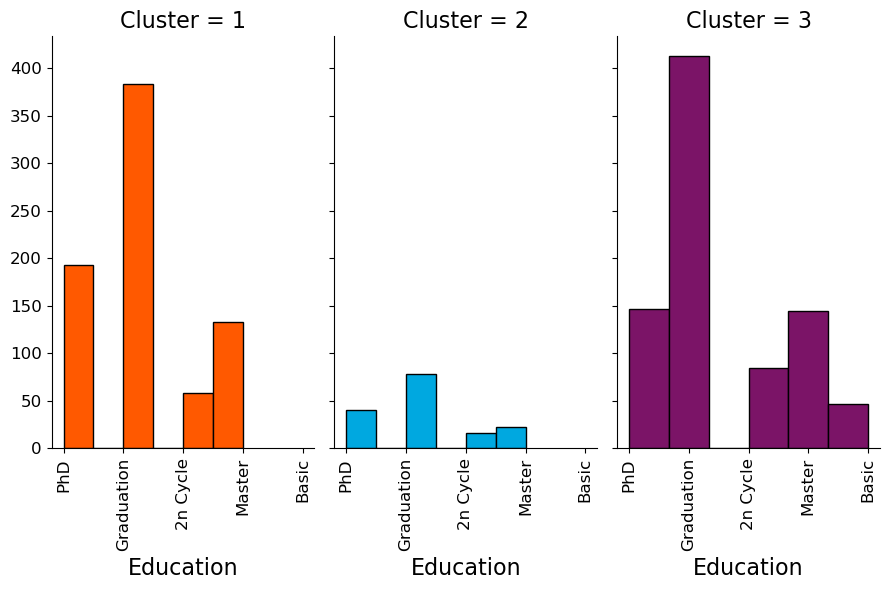

In [108]:
# Cluster versus education

diag = sns.FacetGrid(ifood, col="Cluster", hue="Cluster", palette=ifood_colors)
diag.map(plt.hist, "Education", bins=6, ec="k")
diag.set_xticklabels(rotation=90, color='black')
diag.set_xlabels(size=16, color='black')
diag.set_titles(size=16, color='black')
diag.fig.set_figheight(6)
save_fig("cluster_education")
plt.show()

Saving figure cluster_marital_status


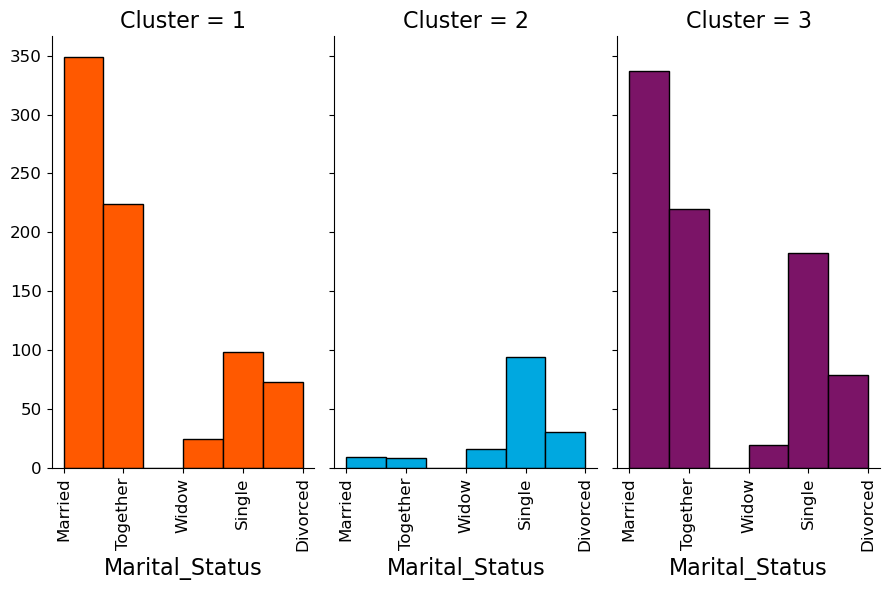

In [100]:
# Cluster versus marital status

diag = sns.FacetGrid(ifood, col="Cluster", hue="Cluster", palette=ifood_colors)
diag.map(plt.hist, "Marital_Status", bins=6, ec="k")
diag.set_xticklabels(rotation=90, color='black')
diag.set_xlabels(size=16, color='black')
diag.set_titles(size=16, color='black')
diag.fig.set_figheight(6)
save_fig("cluster_marital_status")
plt.show()

In [91]:
# Cluster versus income per person

diag = sns.FacetGrid(ifood, col="Cluster", hue="Cluster", palette=ifood_colors)
diag.map(plt.hist, "Income_Per_Person", bins=6, ec="k")
diag.set_xlabels(size=16, color='black')
diag.set_titles(size=16, color='black')
diag.fig.set_figheight(6)
save_fig("cluster_income_per_person")
plt.show()

Saving figure cluster_income_per_person


In [109]:
# Cluster versus number of children

diag = sns.FacetGrid(ifood, col="Cluster", hue="Cluster", palette=ifood_colors)
diag.map(plt.hist, "Num_Children", bins=6, ec="k")
diag.set_yticklabels(color='black')
diag.set_xlabels(size=16, color='black')
diag.set_titles(size=16, color='black')
diag.fig.set_figheight(6)
save_fig("cluster_num_children")
plt.show()

Saving figure cluster_num_children


Saving figure cluster_num_family_members


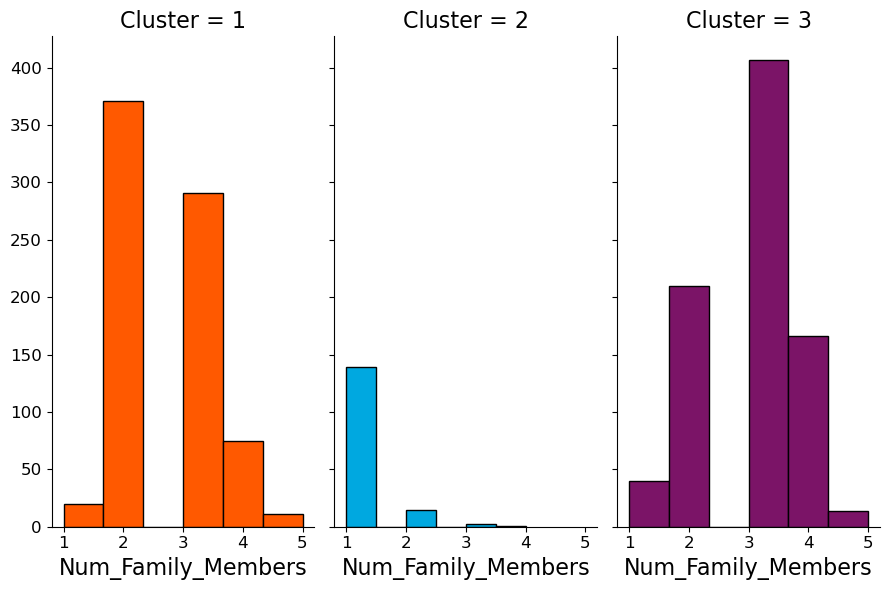

In [93]:
# Cluster versus number of family members

diag = sns.FacetGrid(ifood, col="Cluster", hue="Cluster", palette=ifood_colors)
diag.map(plt.hist, "Num_Family_Members", bins=6, ec="k")
diag.set_xlabels(size=16, color='black')
diag.set_titles(size=16, color='black')
diag.fig.set_figheight(6)
save_fig("cluster_num_family_members")
plt.show()

In [94]:
# Cluster versus age

diag = sns.FacetGrid(ifood, col="Cluster", hue="Cluster", palette=ifood_colors)
diag.map(plt.hist, "Age", bins=6, ec="k")
diag.set_xlabels(size=16, color='black')
diag.set_titles(size=16, color='black')
diag.fig.set_figheight(6)
save_fig("cluster_age")
plt.show()

Saving figure cluster_age


Saving figure cluster_expenses


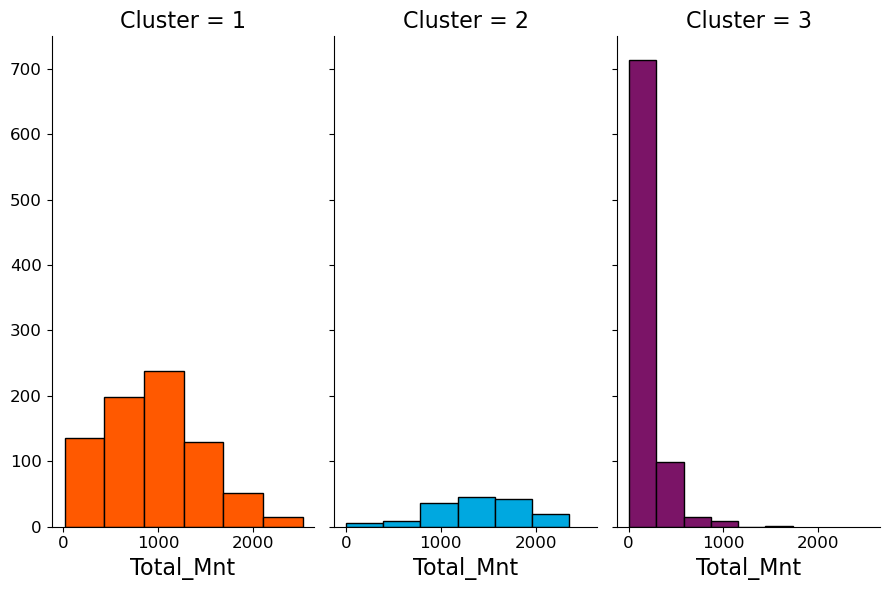

In [95]:
# Cluster versus total amount (Expenses)

diag = sns.FacetGrid(ifood, col="Cluster", hue="Cluster", palette=ifood_colors)
diag.map(plt.hist, "Total_Mnt", bins=6, ec="k")
diag.set_xlabels(size=16, color='black')
diag.set_titles(size=16, color='black')
diag.fig.set_figheight(6)
save_fig("cluster_expenses")
plt.show()

Saving figure cluster_total_purchases


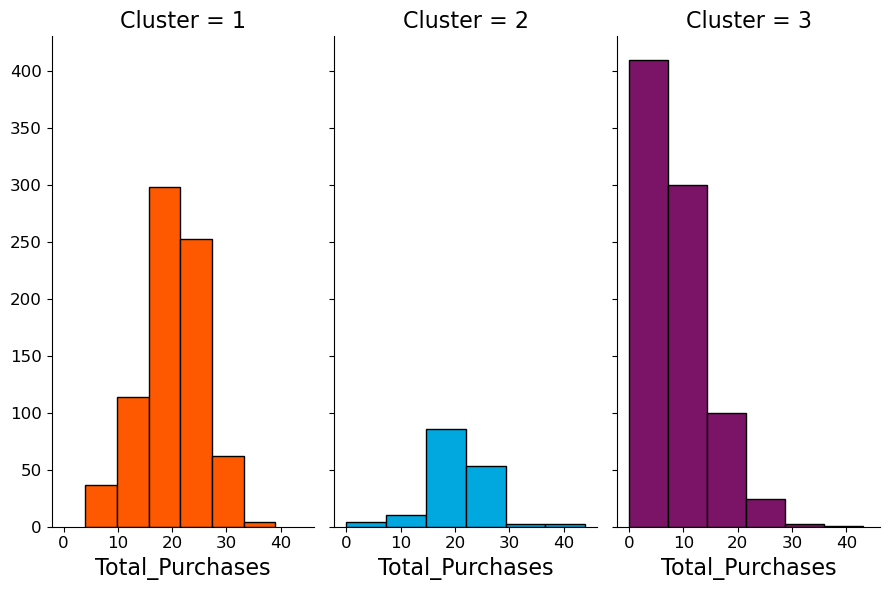

In [96]:
# Cluster versus total purchases

diag = sns.FacetGrid(ifood, col="Cluster", hue="Cluster", palette=ifood_colors)
diag.map(plt.hist, "Total_Purchases", bins=6, ec="k")
diag.set_xlabels(size=16, color='black')
diag.set_titles(size=16, color='black')
diag.fig.set_figheight(6)
save_fig("cluster_total_purchases")
plt.show()

Saving figure cluster_campaigns_accepted


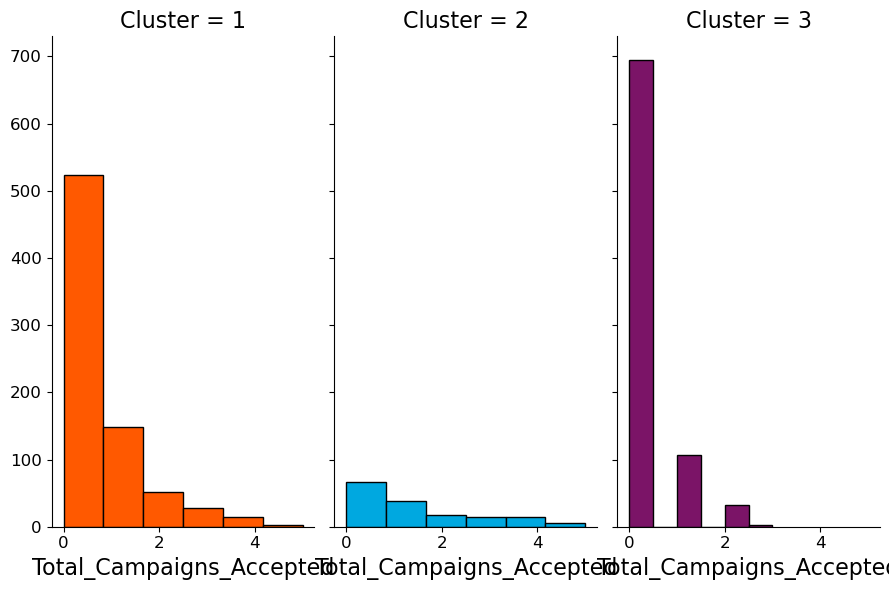

In [97]:
# Cluster versus total campaigns accepted

diag = sns.FacetGrid(ifood, col="Cluster", hue="Cluster", palette=ifood_colors)
diag.map(plt.hist, "Total_Campaigns_Accepted", bins=6, ec="k")
diag.set_xlabels(size=16, color='black')
diag.set_titles(size=16, color='black')
diag.fig.set_figheight(6)
save_fig("cluster_campaigns_accepted")
plt.show()

In [98]:
# Grouping the data by cluster and calculating the mean and standard deviation
cluster_stats = ifood.groupby('Cluster').agg({'Income_Per_Person': ['mean', 'std'],
                                              'Num_Children': ['mean', 'std'],
                                              'Age': ['mean', 'std'],
                                              'Num_Family_Members': ['mean', 'std'],
                                              'Total_Mnt': ['mean', 'std'],
                                              'Total_Purchases': ['mean', 'std'],
                                              'Total_Campaigns_Accepted': ['mean', 'std']})

# Renaming the columns
cluster_stats.columns = ['Income_Per_Person_Mean', 'Income_Per_Person_Std',
                         'Children_Mean', 'Children_Std',
                         'Age_Mean', 'Age_Std',
                         'Num_Family_Members_Mean', 'Num_Family_Members_Std',
                         'Total_Mnt_Mean', 'Total_Mnt_Std',
                         'Total_Purchases_Mean', 'Total_Purchases_Std',
                         'Total_Campaigns_Accepted_Mean', 'Total_Campaigns_Accepted_Std']

# Transposing the DataFrame for better readability
cluster_stats_transposed = cluster_stats.transpose()

# Displaying the transposed table
cluster_stats_transposed

Cluster                                   1             2             3
Income_Per_Person_Mean         27797.576845  75315.447452  12257.889466
Income_Per_Person_Std           9206.739139  14447.172752   5255.947935
Children_Mean                      0.845052      0.031847      1.219833
Children_Std                       0.706241      0.209406      0.701631
Age_Mean                          58.082031     55.101911     52.160096
Age_Std                           11.135402     14.306259     10.929885
Num_Family_Members_Mean            2.591146      1.140127      2.885305
Num_Family_Members_Std             0.758799      0.430542      0.833645
Total_Mnt_Mean                   952.837240   1384.656051    139.575866
Total_Mnt_Std                    513.466584    476.592173    176.225118
Total_Purchases_Mean              19.957031     19.929936      9.187575
Total_Purchases_Std                5.751207      5.597750      5.101781
Total_Campaigns_Accepted_Mean      0.528646      1.273885      0.213859
Total_Campaigns_Accepted_Std       0.948044      1.474621      0.511494

In [116]:
# Contingency table for Marital_Status by cluster
marital_status_cross = pd.crosstab(ifood['Marital_Status'], ifood['Cluster'])

# Contingency table for Education by cluster
education_cross = pd.crosstab(ifood['Education'], ifood['Cluster'])

# Calculating percentages
marital_status_percentage = marital_status_cross.apply(lambda x: x / x.sum(), axis=1)
education_percentage = education_cross.apply(lambda x: x / x.sum(), axis=1)

# Displaying the tables
print("Marital_Status Frequencies by Cluster (%):")
marital_status_percentage

Marital_Status Frequencies by Cluster (%):


Cluster                1         2         3
Marital_Status                              
Divorced        0.401099  0.164835  0.434066
Married         0.502158  0.012950  0.484892
Single          0.262032  0.251337  0.486631
Together        0.495575  0.017699  0.486726
Widow           0.406780  0.271186  0.322034

In [117]:
print("\nEducation Frequencies by Cluster (%):")
education_percentage


Education Frequencies by Cluster (%):


Cluster            1         2         3
Education                               
2n Cycle    0.364780  0.100629  0.534591
Basic       0.000000  0.000000  1.000000
Graduation  0.438857  0.089143  0.472000
Master      0.441860  0.076412  0.481728
PhD         0.507895  0.105263  0.386842

##### Important note:

    1. Cluster 1: Average income, with or without children, higher average age, intermediate number of family members. Relationship status is higher in widow, together, and married, with a higher concentration in PhD. They are intermediate in purchase value but buy frequently. They are also intermediate in campaign conversion.

    2; Cluster 2: High income, without children, intermediate average age, fewer family members. They have more singles and widows, indicating no relationship. They have higher spending on products, lower purchase recency, high average purchase value and volume. This group has the highest campaign conversion rate.

    3. Cluster 3: Low income, with or without children, lower average age, more family members, with more singles than in cluster 1 but similar in relationship status. They have lower education levels (with a high concentration in 2n cycle). They have low purchase volume and value and converted less in the campaign (they are less active).

In summary, the successful group in this campaign is more aligned with cluster 2. Since it also has the lowest number of members, this justifies the financial loss.

In [ ]:
### 1.7 Predictive model